<a href="https://colab.research.google.com/github/Mtorsha/Mtorsha/blob/main/Torsha_699.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name**: Torsha Mazumdar

**Topic**: Ransomware Classification 

**Advisor**: Dr. Nahid Majd

**Tips to run the notebook :  All sections prior to feature selection can be run directly without expanding them. For feature selection, expand each section, select the model of your choice and run the 'Fit Model #' section (also run feature selection in case of ANOVA). For performing the hyperparameter tuning again, run the 'Tuning Hyperparameters' section. 
'Tuning Hyperparameters' section need not be run everytime since the models are already defined after tuning hyperparameters and tuning hyperparameters takes hours of time.**

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing Libraries**

In [ ]:
import requests
import io
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
import sklearn.ensemble as ek
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel,f_classif,SelectKBest
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score,precision_score,classification_report,ConfusionMatrixDisplay,balanced_accuracy_score,roc_curve,roc_auc_score,make_scorer
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression,LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV,RepeatedStratifiedKFold,RandomizedSearchCV,StratifiedKFold,cross_validate
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable
from numpy import mean,std
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint
from keras.models import Sequential
from keras import layers,Input, backend as K 
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
import warnings
warnings.filterwarnings("ignore") 

# **Importing Dataset**
"Ransomware.csv" from https://github.com/muditmathur2020/RansomwareDetection.git

In [ ]:
# Downloading the csv file from the source GitHub account

url = "https://raw.githubusercontent.com/muditmathur2020/RansomwareDetection/master/Ransomware.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')),sep='|')

# **Dataset Exploration**

In [ ]:
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [ ]:
df.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [ ]:
# Checking the size of dataframe
from sys import getsizeof
initial_size = getsizeof(df)/(1024.0**3)
print("Size of DataFrame: {} GB".format(initial_size))

Size of DataFrame: 0.07982607837766409 GB


**Null value check**

In [ ]:
df.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

**Distribution of Labelled Data**

In [ ]:
df.legitimate.value_counts() #1 means legitimate, 0 means malware

0    96724
1    41323
Name: legitimate, dtype: int64

In [ ]:
# Converting labelled data in categories datatype
df.legitimate = df.legitimate.astype('category')
df.legitimate

0         1
1         1
2         1
3         1
4         1
         ..
138042    0
138043    0
138044    0
138045    0
138046    0
Name: legitimate, Length: 138047, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
# df.legitimate.replace((0,1), ('Ransomware','Safe'), inplace=True)
# df.legitimate

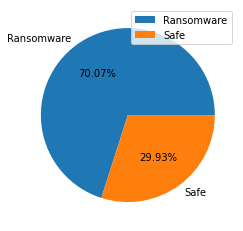

In [ ]:
plt.pie(df.legitimate.value_counts().values.tolist(), labels=['Ransomware','Safe'], autopct='%.2f%%')
plt.legend()
plt.show()

**Checking duplicates**



In [ ]:
df.md5.nunique()

138047

In [ ]:
df.md5.shape[0]

138047

There are no duplicate files as no 2 files can have same md5 without the same content

**Column Analysis**

In [ ]:
df.shape[1]

57

In [ ]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [ ]:
df.dtypes

Name                             object
md5                              object
Machine                           int64
SizeOfOptionalHeader              int64
Characteristics                   int64
MajorLinkerVersion                int64
MinorLinkerVersion                int64
SizeOfCode                        int64
SizeOfInitializedData             int64
SizeOfUninitializedData           int64
AddressOfEntryPoint               int64
BaseOfCode                        int64
BaseOfData                        int64
ImageBase                       float64
SectionAlignment                  int64
FileAlignment                     int64
MajorOperatingSystemVersion       int64
MinorOperatingSystemVersion       int64
MajorImageVersion                 int64
MinorImageVersion                 int64
MajorSubsystemVersion             int64
MinorSubsystemVersion             int64
SizeOfImage                       int64
SizeOfHeaders                     int64
CheckSum                          int64


# **since name or md5 do not provide more information that can be used to predict the class, we drop these fields.**

In [ ]:
ransomware_df=df.drop(columns=['Name','md5'], axis=1)
ransomware_df.shape[1]

55

**Exploratory data analysis**

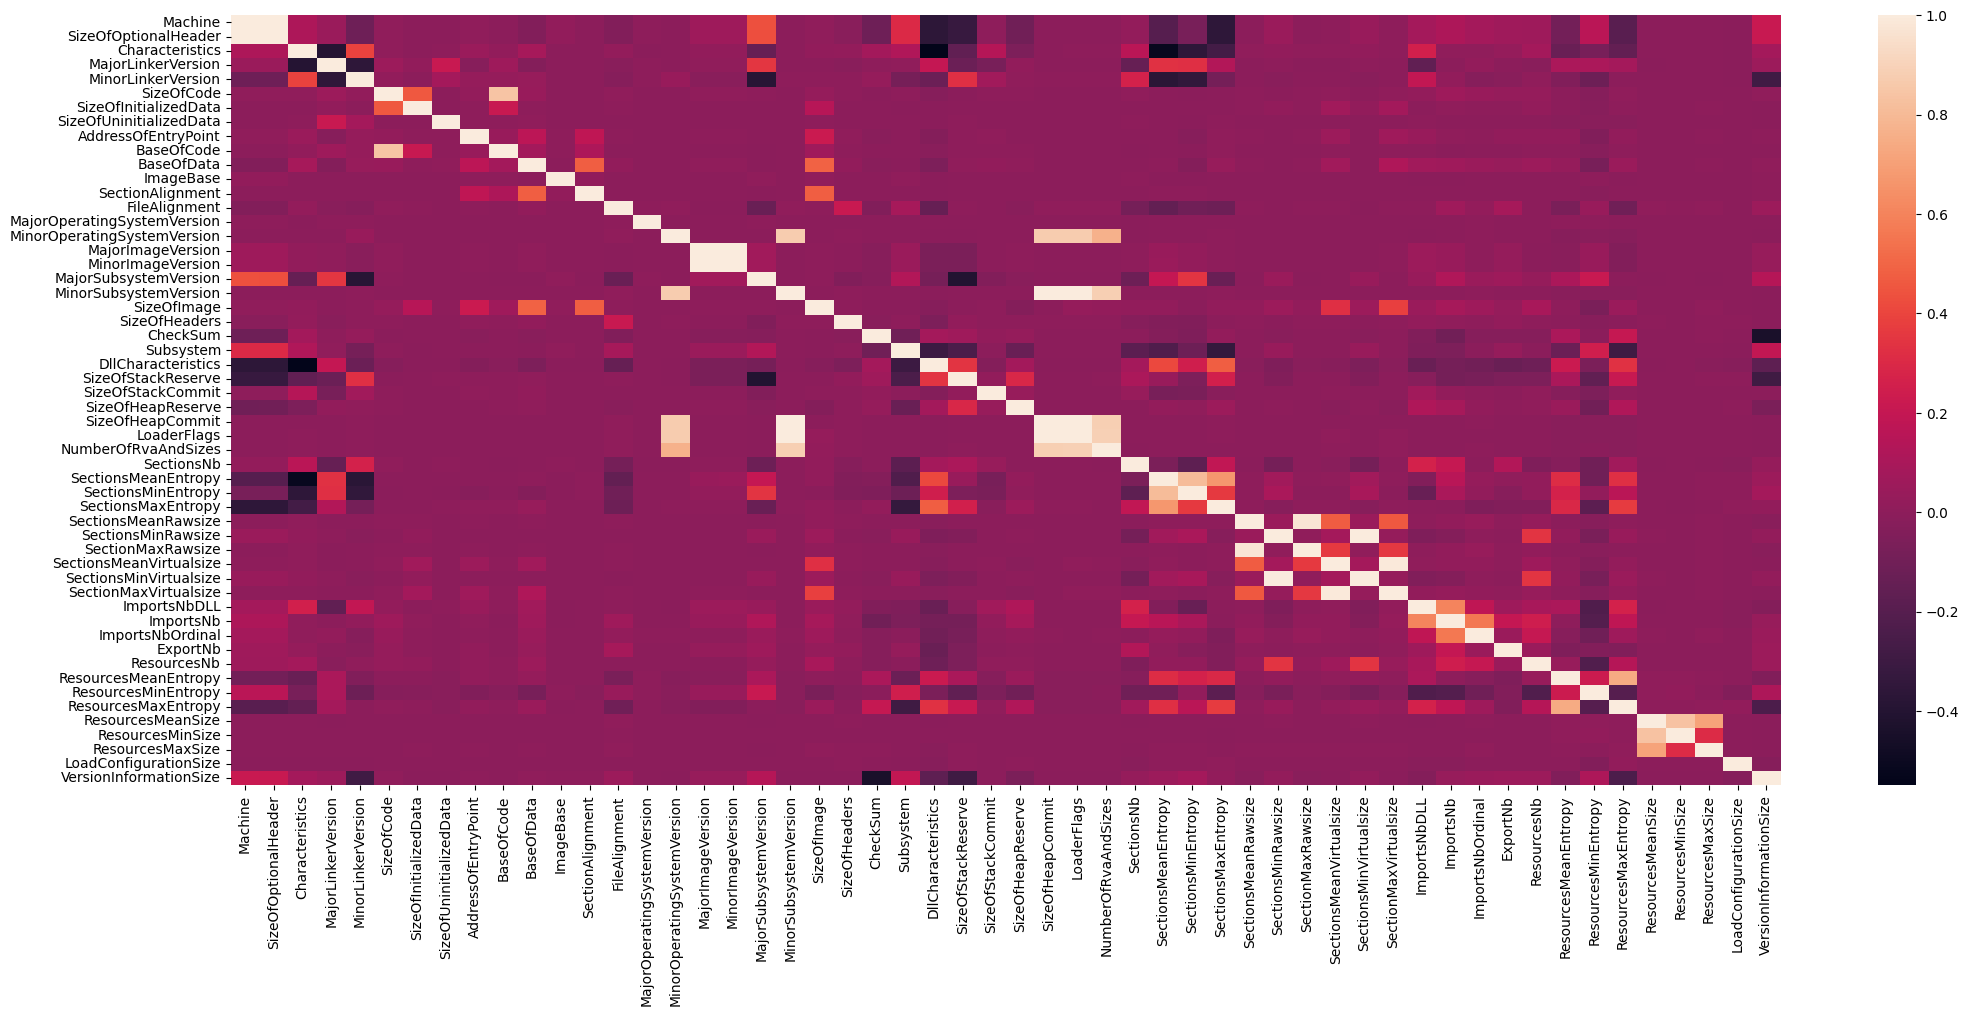

In [ ]:
plt.figure(figsize = (25,10))
sns.heatmap(ransomware_df.corr())
plt.show()

 # **Split data into training and testing**

In [ ]:
ransomware_df.shape
print("Total:\t",ransomware_df.shape)

Y = ransomware_df['legitimate']
X = ransomware_df.drop(['legitimate'], axis=1)

# Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program 

print("X train:",X_train.shape)
print("Y train:", y_train.shape)

print("X test:\t",X_test.shape)
print("Y test:\t", y_test.shape)

Total:	 (138047, 55)
X train: (96632, 54)
Y train: (96632,)
X test:	 (41415, 54)
Y test:	 (41415,)


In [ ]:
y_train.value_counts()

0    67629
1    29003
Name: legitimate, dtype: int64

# **Z-score standardization technique to convert each of the variables into a similar scale by centering each of the variables at zero with a standard deviation of 1**

In [ ]:
std_scaler = StandardScaler()
X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)

# **Feature Selection and Model Creation and Evaluation**

We have numerical input data and a categorical (class) target variable. Therefore, we use the below feature selection techniques

# **ANOVA f-test Feature Selection** 

## Feature Selection using the dataset prior to standardization (X_train, y_train)

Feature 0: Machine ,Score: 41229.962631
Feature 1: SizeOfOptionalHeader ,Score: 41241.934894
Feature 2: Characteristics ,Score: 5125.642185
Feature 3: MajorLinkerVersion ,Score: 26.338506
Feature 4: MinorLinkerVersion ,Score: 2072.497021
Feature 5: SizeOfCode ,Score: 30.121067
Feature 6: SizeOfInitializedData ,Score: 2.419359
Feature 7: SizeOfUninitializedData ,Score: 1.695443
Feature 8: AddressOfEntryPoint ,Score: 0.008620
Feature 9: BaseOfCode ,Score: 3.375687
Feature 10: BaseOfData ,Score: 0.259633
Feature 11: ImageBase ,Score: 2.345946
Feature 12: SectionAlignment ,Score: 0.992709
Feature 13: FileAlignment ,Score: 1539.608442
Feature 14: MajorOperatingSystemVersion ,Score: 0.175192
Feature 15: MinorOperatingSystemVersion ,Score: 0.075477
Feature 16: MajorImageVersion ,Score: 740.287629
Feature 17: MinorImageVersion ,Score: 721.347291
Feature 18: MajorSubsystemVersion ,Score: 15841.791861
Feature 19: MinorSubsystemVersion ,Score: 0.036714
Feature 20: SizeOfImage ,Score: 0.875038
Fea

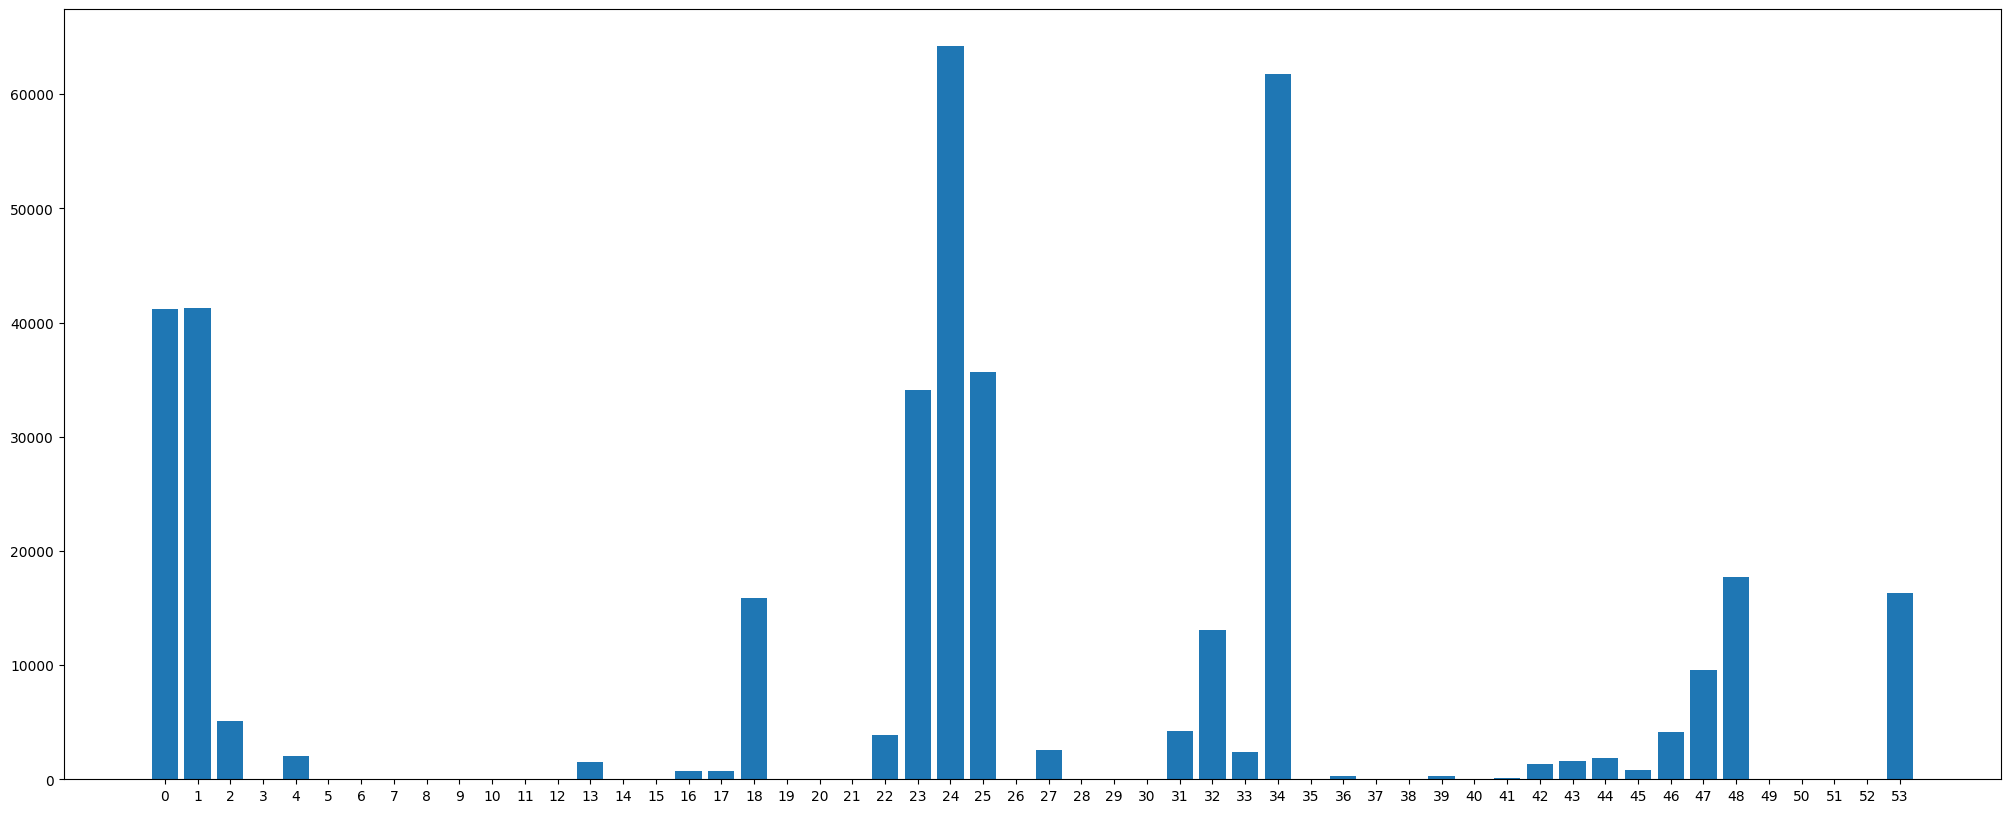

In [ ]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
for i in range(len(fs.scores_)):
	print('Feature %d: %s ,Score: %f' % (i,fs.feature_names_in_[i], fs.scores_[i]))
# plot the scores
plt.figure(figsize = (25,10))
i = [i for i in range(len(fs.scores_))]
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(i)
plt.show()

In [ ]:
fs = SelectKBest(score_func=f_classif, k=12).fit(X_train, y_train)
cols = fs.get_support(indices=True)
print(cols)
selected_features=[]
for i in cols:
	print('Feature %d: %s ,Score: %f' % (i,fs.feature_names_in_[i], fs.scores_[i]))
	selected_features.append(fs.feature_names_in_[i])
print(selected_features)


[ 0  1  2 18 23 24 25 32 34 47 48 53]
Feature 0: Machine ,Score: 41229.962631
Feature 1: SizeOfOptionalHeader ,Score: 41241.934894
Feature 2: Characteristics ,Score: 5125.642185
Feature 18: MajorSubsystemVersion ,Score: 15841.791861
Feature 23: Subsystem ,Score: 34099.923924
Feature 24: DllCharacteristics ,Score: 64232.662393
Feature 25: SizeOfStackReserve ,Score: 35647.469962
Feature 32: SectionsMeanEntropy ,Score: 13089.965558
Feature 34: SectionsMaxEntropy ,Score: 61744.409457
Feature 47: ResourcesMinEntropy ,Score: 9560.193532
Feature 48: ResourcesMaxEntropy ,Score: 17743.284950
Feature 53: VersionInformationSize ,Score: 16291.747201
['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorSubsystemVersion', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SectionsMeanEntropy', 'SectionsMaxEntropy', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'VersionInformationSize']


## Fit a **decision tree** on the training dataset - 

Model 1 - Using ANOVA and DECISION TREE

### Tuning Hyperparameters

In [ ]:
count={}
clf = tree.DecisionTreeClassifier(random_state=10)

for i in range(20):
  tree_params = [{'max_depth': list(range(2, 11)), 
                  'max_leaf_nodes': list(range(2, 31)),
                  'criterion':['entropy','gini']}]
                  #'min_samples_leaf': list(range(2,9)) }]
  grid = GridSearchCV(estimator=clf, param_grid=tree_params, cv=5, n_jobs=-1, scoring='accuracy')
  grid.fit(X_train_std[selected_features], y_train)
  if grid.best_params_['criterion'] in count:
   count[grid.best_params_['criterion']]+=1
  else:
   count[grid.best_params_['criterion']]=1

  if 'max_depth : '+str(grid.best_params_['max_depth']) in count:
    count['max_depth : '+str(grid.best_params_['max_depth'])]+=1
  else:
    count['max_depth : '+str(grid.best_params_['max_depth'])]=1

  if 'max_leaf_nodes : '+str(grid.best_params_['max_leaf_nodes']) in count:
    count['max_leaf_nodes : '+str(grid.best_params_['max_leaf_nodes'])]+=1
  else:
    count['max_leaf_nodes : '+str(grid.best_params_['max_leaf_nodes'])]=1

#  if grid.best_params_['min_samples_leaf'] in count:
#    count[grid.best_params_['min_samples_leaf']]+=1
#  else:
#    count[grid.best_params_['min_samples_leaf']]=1
   
print(count)

{'gini': 20, 'max_depth : 9': 20, 'max_leaf_nodes : 30': 20}



Model 1:
+-----------+--------------------+------------------------+
| max_depth |      Accuracy      |          std           |
+-----------+--------------------+------------------------+
|     2     | 0.9576291111242261 | 0.0008113558456624898  |
|     3     | 0.9647488345366864 |  0.001100740752520143  |
|     4     | 0.9712031834239445 | 0.0009926845340725902  |
|     5     | 0.9813245633970518 | 0.0009220972813622814  |
|     6     | 0.9841488060462986 | 0.0004489498306508299  |
|     7     | 0.9855239682233294 | 0.0007069150169240431  |
|     8     | 0.9871504746323575 | 0.0006145683200439714  |
|     9     | 0.988695673677061  | 0.00032528266374642456 |
|     10    | 0.9896937678514851 | 0.0005505302544739483  |
+-----------+--------------------+------------------------+


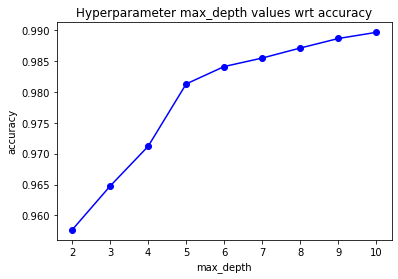


Model 2:
+----------------+--------------------+------------------------+
| max_leaf_nodes |      Accuracy      |          std           |
+----------------+--------------------+------------------------+
|       2        | 0.9188513528039296 |  0.002402253185114726  |
|       3        | 0.9546348198551995 | 0.0015863328673973302  |
|       4        | 0.9576291111242261 | 0.0008113558456624898  |
|       5        | 0.9576291111242261 | 0.0008113558456624898  |
|       6        | 0.9595365948404654 | 0.0012192661386547338  |
|       7        | 0.9686155213535708 | 0.0008244587215842505  |
|       8        | 0.9700867832450568 | 0.0008920856701220581  |
|       9        | 0.9718242035830558 | 0.0008327995896152807  |
|       10       | 0.9739904293461861 | 0.0012692699235716679  |
|       11       | 0.9775835612681876 | 0.0012121915409358556  |
|       12       | 0.9790843944679978 |  0.001379022785030298  |
|       13       | 0.980023343292725  | 0.0011249098527704262  |
|       14     

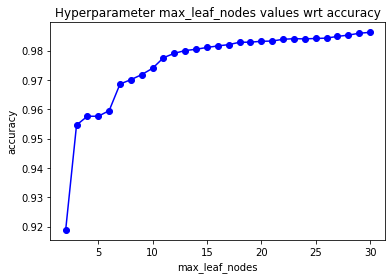

In [ ]:
# tune max_depth hyperparameter
max_depth=[]
acc_metric1=[]
print("\nModel 1:")
table1 = PrettyTable()
table1.field_names = ['max_depth','Accuracy', 'std']
for n in range (2,11):
    clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state=10, max_depth=n)
    scores = cross_val_score(clf, X_train_std[selected_features], y_train, cv=5)
    # print("Hyperparameter tuning: max_depth= ", n)
    # print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    max_depth.append(n)
    acc_metric1.append(mean(scores))
    table1.add_row([n, mean(scores), std(scores)])

print(table1)

plt.title("Hyperparameter max_depth values wrt accuracy") 
plt.xlabel("max_depth") 
plt.ylabel("accuracy") 
plt.plot(max_depth,acc_metric1,marker='o', color='b')
plt.show()

# tune max_leaf_nodes hyperparameter
max_leaf_nodes=[]
acc_metric2=[]
print("\nModel 2:")
table2 = PrettyTable()
table2.field_names = ['max_leaf_nodes','Accuracy', 'std']
for n in range (2, 31):
    clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state=10, max_leaf_nodes=n)
    scores = cross_val_score(clf, X_train_std[selected_features], y_train, cv=5)
    # print("Hyperparameter tuning: max_leaf_nodes=", n)
    # print('\tAccuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    max_leaf_nodes.append(n)
    acc_metric2.append(mean(scores))
    table2.add_row([n, mean(scores), std(scores)])

print(table2)

plt.title("Hyperparameter max_leaf_nodes values wrt accuracy") 
plt.xlabel("max_leaf_nodes") 
plt.ylabel("accuracy") 
plt.plot(max_leaf_nodes,acc_metric2,marker='o', color='b')
plt.show()

### Fit model 1

Scores:  0.987 0.001
Decision Tree numbers:
Depth: 9 Number of leaves: 30
acc: 0.9874782680685488


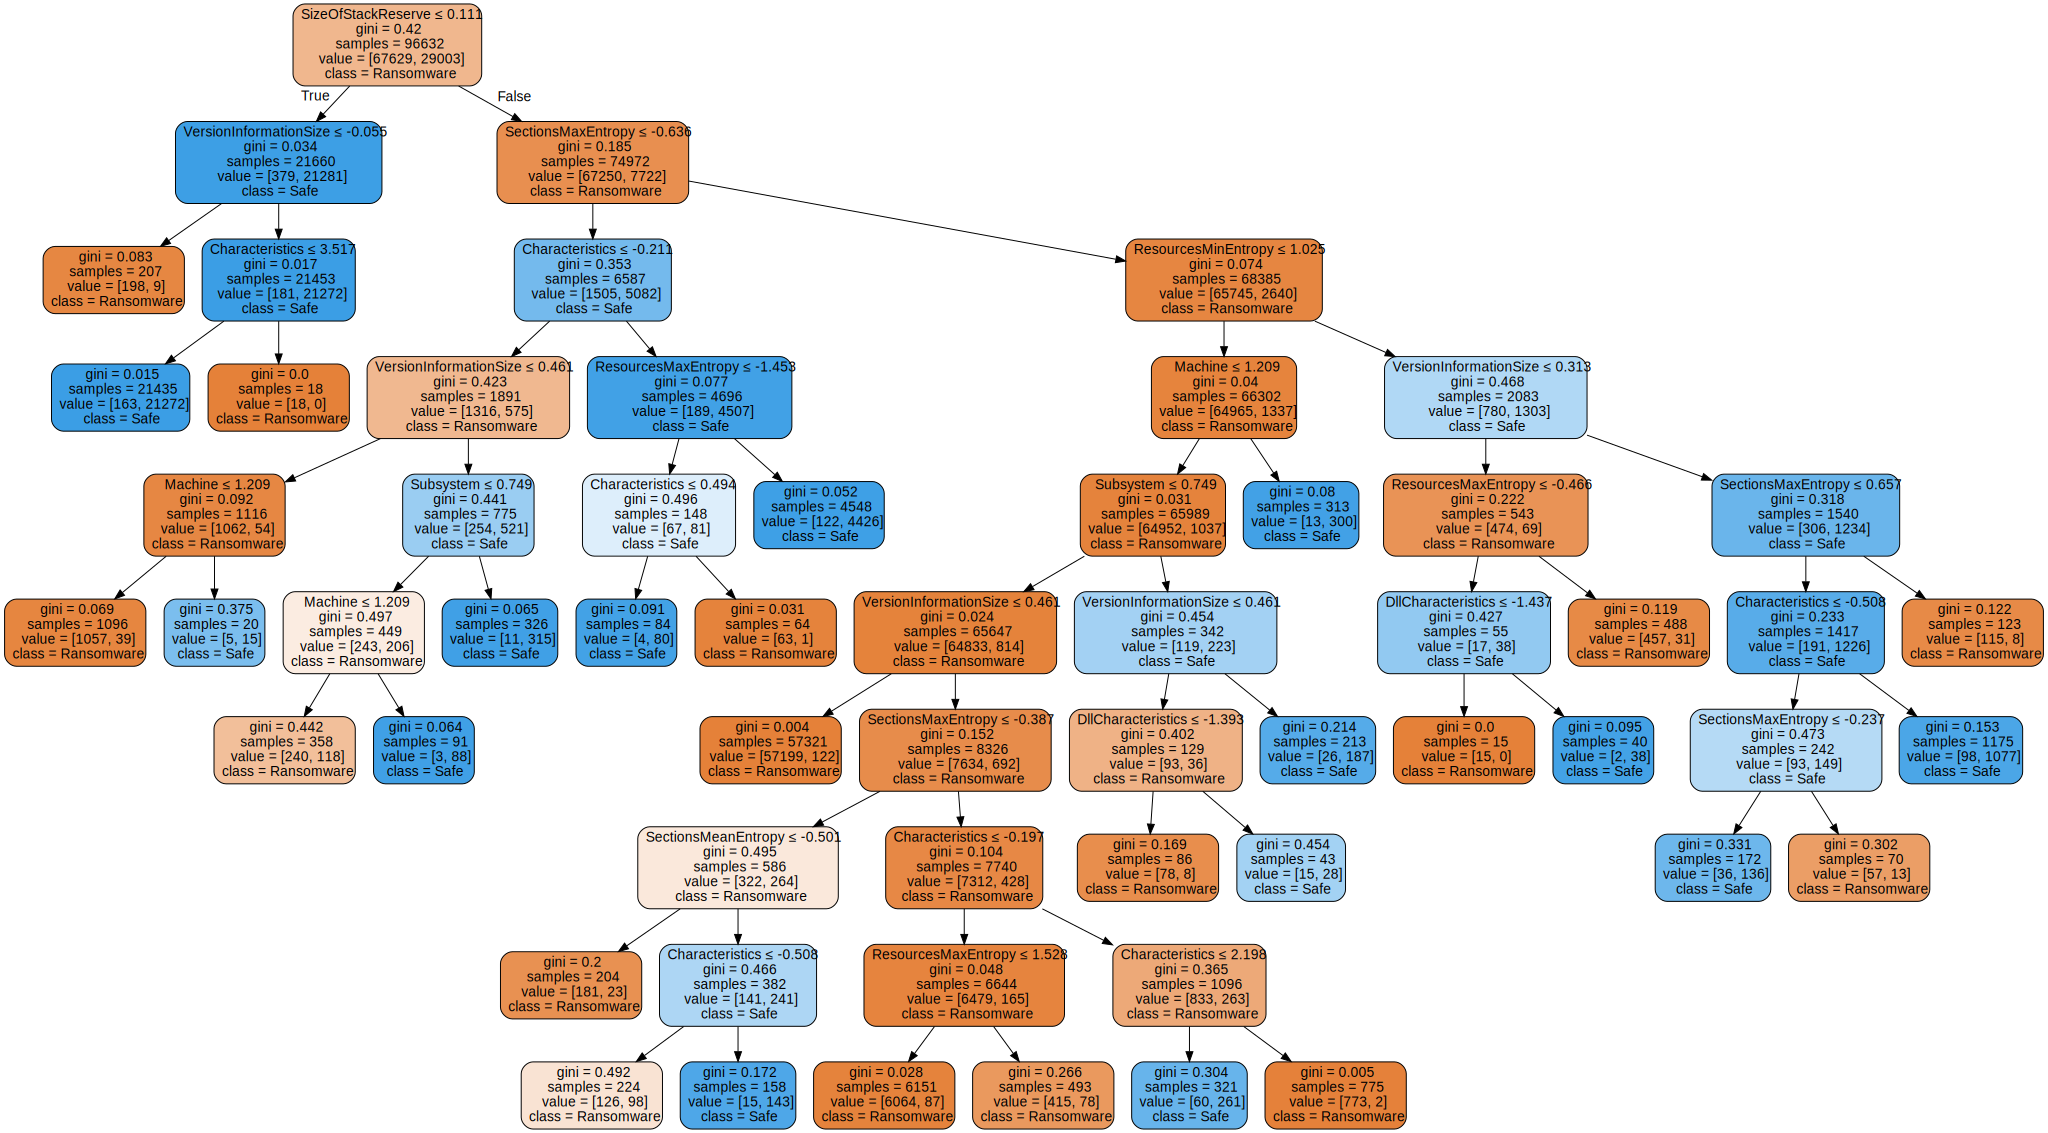

In [ ]:
Model1 = tree.DecisionTreeClassifier(criterion='gini', random_state=10, max_depth = 9, max_leaf_nodes = 30)
scores = cross_val_score(Model1, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model1.fit(X_train_std[selected_features], y_train)
y_pred = Model1.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)

print('Decision Tree numbers:')
print("Depth:", Model1.get_depth(), 'Number of leaves:', Model1.get_n_leaves())
print('acc:', acc)

import graphviz 
dot_data = tree.export_graphviz(Model1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Ransomware") 

dot_data = tree.export_graphviz(Model1, out_file= None, 
                                feature_names= X_train_std[selected_features].columns,  
                                class_names= ['Ransomware','Safe'],  
                                filled= True, rounded= True,  
                                special_characters= True)  
graph = graphviz.Source(dot_data, format='png')  
graph 

## Fit a **Random Forest** on the training dataset -

Model 2 - Using ANOVA and RANDOM FOREST

### Tuning Hyperparameters

In [ ]:
count={}
rfc = RandomForestClassifier()
for i in range(20):
  forest_params = [{'criterion':['entropy','gini'],'n_estimators': list(range(10, 120,10))}]
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  clf = GridSearchCV(rfc, forest_params, cv = cv, scoring='accuracy')
  clf.fit(X_train_std[selected_features], y_train)
  print('Iteration ',i,':',clf.best_params_)
  if clf.best_params_['criterion'] in count:
    count[clf.best_params_['criterion']]+=1
  else:
    count[clf.best_params_['criterion']]=1
  if 'n_estimators : '+str(clf.best_params_['n_estimators']) in count:
    count['n_estimators : '+str(clf.best_params_['n_estimators'])]+=1
  else:
    count['n_estimators : '+str(clf.best_params_['n_estimators'])]=1
print(count)

Iteration  0 : {'criterion': 'gini', 'n_estimators': 100}


KeyboardInterrupt: ignored

In [ ]:
# Compare performance of Gini and Entropy hyperparameters
rf_clfE = RandomForestClassifier(criterion='entropy')
rf_clfE.fit(X_train_std[selected_features], y_train)
rf_clfG = RandomForestClassifier(criterion='gini')   
rf_clfG.fit(X_train_std[selected_features],y_train)

table = PrettyTable()
table.field_names = ['cv','Gini', 'Entropy',]
# Evaluate the models Gini vs Entropy for different k folds on cross validation
for n in range (2, 11):
  # Prepare the k-fold cross validation
  kf = KFold(random_state=10, shuffle=True, n_splits= n) # random_state= an int for reproducible output across multiple function calls
  scoresG = cross_val_score(rf_clfG, X_train_std[selected_features], y_train, scoring='accuracy', cv=kf, n_jobs=-1)
  scoresE = cross_val_score(rf_clfE, X_train_std[selected_features], y_train, scoring='accuracy', cv=kf, n_jobs=-1)
  table.add_row([n, mean(scoresG), mean(scoresE), ])

print(table)

+----+--------------------+--------------------+
| cv |        Gini        |      Entropy       |
+----+--------------------+--------------------+
| 2  | 0.9937452867852549 | 0.9938635792337607 |
| 3  | 0.9942110633012465 | 0.9942332431353412 |
| 4  | 0.9943663256369545 | 0.9944254712052936 |
| 5  | 0.9945363742561442 | 0.9942702163562409 |
| 6  | 0.994602907036922  | 0.9945733339247956 |
| 7  | 0.994595518838815  | 0.9946990243486987 |
| 8  | 0.9947212053851313 | 0.9946250913495247 |
| 9  | 0.994602919494496  | 0.9946472781788174 |
| 10 | 0.9946694477371301 | 0.9946620562083075 |
+----+--------------------+--------------------+


In [ ]:
n_estimators=[]
acc_metric1=[]  # to hold accuracy of n_estimators hyperparemeter

kf = KFold(random_state=10, shuffle=True, n_splits= 8)
# Model 1, tune n_estimators hyperparameter
table1 = PrettyTable()
table1.field_names = ['n_estimators','Accuracy', 'std']
for n in range (10, 120,10):
    clf = RandomForestClassifier(criterion='gini', n_estimators=n)
    scores = cross_val_score(clf, X_train_std[selected_features], y_train, cv=kf)
    n_estimators.append(n)
    acc_metric1.append(mean(scores))
    table1.add_row([n, mean(scores), std(scores)])

print(table1)

+--------------+--------------------+------------------------+
| n_estimators |      Accuracy      |          std           |
+--------------+--------------------+------------------------+
|      10      | 0.9940262414037836 | 0.0006736321354579604  |
|      20      | 0.9945585513006072 | 0.00038553096133062706 |
|      30      | 0.9945289799375475 | 0.0005264787805430258  |
|      40      | 0.9945437675867994 | 0.0005033210128338307  |
|      50      | 0.9946324842996076 | 0.00037721711668080386 |
|      60      | 0.9946620582862966 | 0.0005170576635791562  |
|      70      | 0.9946842401974458 | 0.00043094579937977414 |
|      80      | 0.9946990234739821 | 0.0004345269150734609  |
|      90      | 0.9946842406347174 | 0.0004546417493606075  |
|     100      | 0.9947359934716546 | 0.0005155487029439374  |
|     110      | 0.9946324851741508 | 0.0003470130098089698  |
+--------------+--------------------+------------------------+


### Fit Model 2

In [ ]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [ ]:
Model2 = RandomForestClassifier(criterion='gini', n_estimators=100)
# scores = cross_val_score(Model2, X_train_std[selected_features], y_train, cv=5)
scores = cross_validate(Model2, X_train_std[selected_features], y_train, cv=5,scoring=scorers,return_train_score=True)
scores

{'fit_time': array([13.71908975,  9.19878864,  5.57885265,  6.07618499,  6.45457697]),
 'score_time': array([0.44595695, 0.18753982, 0.1841681 , 0.18277669, 0.3674407 ]),
 'test_precision_score': array([0.98661404, 0.98814025, 0.98997754, 0.98594928, 0.9862543 ]),
 'train_precision_score': array([0.9999569 , 0.9999138 , 0.9999138 , 0.99991381, 1.        ]),
 'test_recall_score': array([0.99103603, 0.99103603, 0.98775862, 0.99206897, 0.98948457]),
 'train_recall_score': array([0.9999138, 0.9999138, 0.9999138, 1.       , 0.9999138]),
 'test_accuracy_score': array([0.99327366, 0.99373933, 0.99332505, 0.9933768 , 0.99270413]),
 'train_accuracy_score': array([0.99996119, 0.99994826, 0.99994826, 0.99997413, 0.99997413])}

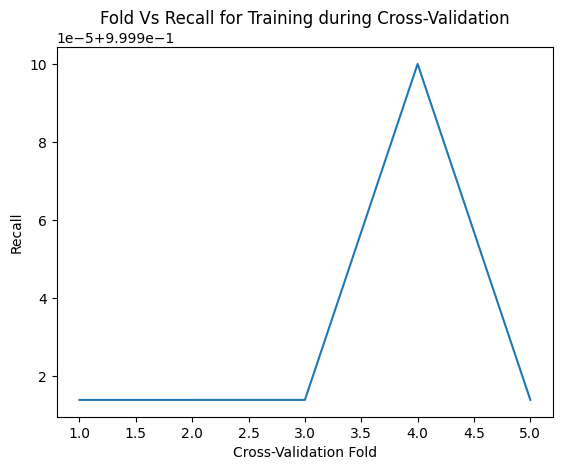

In [ ]:
# Recall
plt.plot(range(1,6),scores['train_recall_score'])

plt.title('Fold Vs Recall for Training during Cross-Validation')
plt.ylabel('Recall')
plt.xlabel('Cross-Validation Fold')
plt.show()

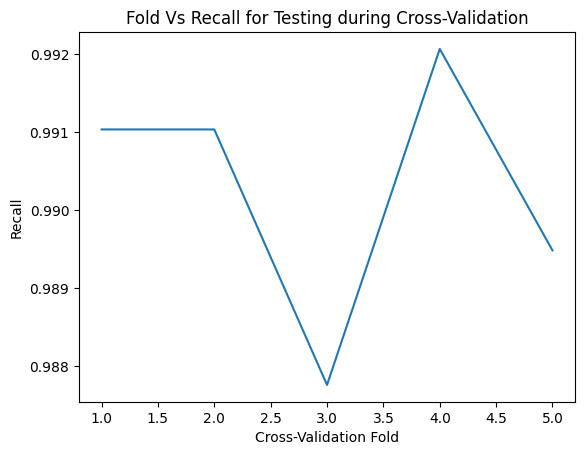

In [ ]:
# Recall
plt.plot(range(1,6),scores['test_recall_score'])

plt.title('Fold Vs Recall for Testing during Cross-Validation')
plt.ylabel('Recall')
plt.xlabel('Cross-Validation Fold')
plt.show()

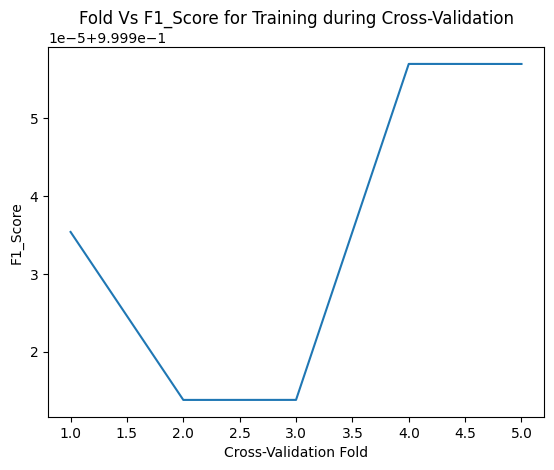

In [ ]:
#F1 Score

list_f1_score=[]

for p,r in list(map(lambda x, y:(x,y), scores['train_precision_score'], scores['train_recall_score'])):

  list_f1_score.append((2*p*r)/(p+r))

list_f1_score


plt.plot(range(1,6),list_f1_score)

plt.title('Fold Vs F1_Score for Training during Cross-Validation')
plt.ylabel('F1_Score')
plt.xlabel('Cross-Validation Fold')
plt.show()

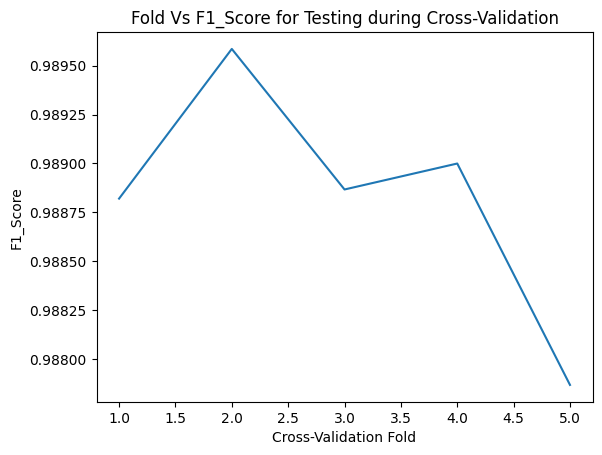

In [ ]:
#F1 Score

list_f1_score=[]

for p,r in list(map(lambda x, y:(x,y), scores['test_precision_score'], scores['test_recall_score'])):

  list_f1_score.append((2*p*r)/(p+r))

list_f1_score


plt.plot(range(1,6),list_f1_score)

plt.title('Fold Vs F1_Score for Testing during Cross-Validation')
plt.ylabel('F1_Score')
plt.xlabel('Cross-Validation Fold')
plt.show()

In [ ]:
Model2.fit(X_train_std[selected_features], y_train)
y_pred = Model2.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

0.9999586058448547


## Fit **Logistic Regression** on the training dataset -
Model 3 - Using ANOVA and LOGISTIC REGRESSION

### Tuning Hyperparameters

In [ ]:
count={}
lr = LogisticRegression()
params = [{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
           'C': [100, 10, 1.0, 0.1, 0.01],
           'penalty': ['l2']}]
for i in range(20):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  grid_search = GridSearchCV(estimator=lr, param_grid=params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
  grid = grid_search.fit(X_train_std[selected_features], y_train)
  print('Iteration ',i,':',grid.best_params_)
  if grid.best_params_['solver'] in count:
   count[grid.best_params_['solver']]+=1
  else:
   count[grid.best_params_['solver']]=1

  if 'C : '+str(grid.best_params_['C']) in count:
    count['C : '+str(grid.best_params_['C'])]+=1
  else:
    count['C : '+str(grid.best_params_['C'])]=1

print(count)
# summarize results
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))


Iteration  0 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  1 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  2 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  3 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  4 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  5 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  6 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  7 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  8 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  9 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  10 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  11 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  12 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  13 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  14 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Iteration  15 : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
It

### Fit Model 3

In [ ]:
Model3 = LogisticRegression(C=100, penalty= 'l2', solver='lbfgs')
scores = cross_val_score(Model3, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model3.fit(X_train_std[selected_features], y_train)
y_pred = Model3.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.978 0.001
0.9776988989154731


## Fit **Naive Bayes** on the training dataset -
Model 4 - Using ANOVA and NAIVE BAYES

### Tuning Hyperparameters

In [ ]:
# param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
# nb=GaussianNB()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# clf = GridSearchCV(nb, param_grid_nb, cv = cv, scoring='accuracy')
# clf.fit(X_train_std[selected_features], y_train)
# print(clf.best_params_)

In [ ]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nb=GaussianNB()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = RandomizedSearchCV(nb, param_grid_nb, cv = cv, n_iter = 5, scoring='accuracy',verbose=2, random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(X_train_std[selected_features], y_train)
print('Best hyper parameter:', clf.best_params_)

Fitting 30 folds for each of 5 candidates, totalling 150 fits
Best hyper parameter: {'var_smoothing': 0.0001}


### Fit Model 4

In [ ]:
Model4 = GaussianNB(var_smoothing=0.0001)
scores = cross_val_score(Model4, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model4.fit(X_train_std[selected_features], y_train)
y_pred = Model4.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.934 0.001
0.9344006126334962


## Fit **Support Vector Classification** on the training dataset -
Model 5 - Using ANOVA and Support Vector Classification.

### Tuning Hyperparameters

In [ ]:
# param_grid = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
#          'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
#          'kernel':['rbf','linear']
#         }
# sv=svm.SVC()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# clf = GridSearchCV(sv, param_grid, cv = cv, scoring='accuracy')
# clf.fit(X_train_std[selected_features], y_train)
# print(clf.best_params_)

# param_grid = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
#          'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
#          'kernel':['rbf','linear']
#         }
# sv=svm.SVC()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# clf = RandomizedSearchCV(sv, param_grid, cv = cv, n_iter = 5, scoring='accuracy',verbose=2, random_state=42, n_jobs=-1, return_train_score=True)
# clf.fit(X_train_std[selected_features], y_train)
# print('Best hyper parameter:', clf.best_params_)

In [ ]:
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
acc_metric1=[]  # to hold accuracy of C hyperparemeter

kf = KFold(random_state=10, shuffle=True, n_splits= 8)
# Model 1, tune n_estimators hyperparameter
table1 = PrettyTable()
table1.field_names = ['C','Accuracy', 'std']
for n in C:
    clf = svm.SVC(C=n)
    scores = cross_val_score(clf, X_train_std[selected_features], y_train, cv=kf)
    acc_metric1.append(mean(scores))
    table1.add_row([n, mean(scores), std(scores)])

print(table1)

gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
acc_metric2=[]  # to hold accuracy of gamma hyperparemeter

kf = KFold(random_state=10, shuffle=True, n_splits= 8)
# Model 1, tune n_estimators hyperparameter
table2 = PrettyTable()
table2.field_names = ['gamma','Accuracy', 'std']
for n in gamma:
    clf = svm.SVC(gamma=n)
    scores = cross_val_score(clf, X_train_std[selected_features], y_train, cv=kf)
    acc_metric2.append(mean(scores))
    table2.add_row([n, mean(scores), std(scores)])

print(table2)

kernel=['rbf','linear']
acc_metric3=[]  # to hold accuracy of kernel hyperparemeter

kf = KFold(random_state=10, shuffle=True, n_splits= 8)
# Model 1, tune n_estimators hyperparameter
table3 = PrettyTable()
table3.field_names = ['kernel','Accuracy', 'std']
for n in kernel:
    clf = svm.SVC(kernel=n)
    scores = cross_val_score(clf, X_train_std[selected_features], y_train, cv=kf)
    acc_metric3.append(mean(scores))
    table3.add_row([n, mean(scores), std(scores)])

print(table3)

+------+--------------------+-----------------------+
|  C   |      Accuracy      |          std          |
+------+--------------------+-----------------------+
| 0.05 | 0.9835573610159667 | 0.0006688779084752973 |
| 0.1  | 0.984577627044561  | 0.0005465631580297411 |
| 0.2  | 0.9853465292721678 | 0.0004935555978977245 |
| 0.3  | 0.9858492721786474 | 0.0005881570224621597 |
| 0.25 | 0.9856200793570202 | 0.0005406857133988646 |
| 0.4  | 0.9862706873869574 | 0.0005158712591613468 |
| 0.5  | 0.9862263296864606 | 0.0006169570355507762 |
| 0.6  | 0.9864333392851239 | 0.0005515185013249738 |
| 0.7  | 0.9866921060934399 | 0.0006538277889663111 |
| 0.8  | 0.9868769377163978 | 0.0006004535287183081 |
| 0.9  | 0.986958263665481  | 0.0006279128172149584 |
|  1   | 0.9870174094525012 | 0.0006180966724679018 |
+------+--------------------+-----------------------+
+-------+--------------------+------------------------+
| gamma |      Accuracy      |          std           |
+-------+---------------

### Fit Model 5

In [ ]:
Model5 = svm.SVC(C=1,gamma=0.9,kernel='rbf',probability=True)
scores = cross_val_score(Model5, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model5.fit(X_train_std[selected_features], y_train)
y_pred = Model5.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.990 0.001
0.9925283549962746


## Fit **kNN** on the training dataset -
Model 6 - Using ANOVA and kNN

### Tuning Hyperparameters

In [ ]:
param_grid = {'n_neighbors': range(5,9)}
knn = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = RandomizedSearchCV(knn, param_grid, cv = cv, n_iter = 5, scoring='accuracy',verbose=2, random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(X_train_std[selected_features], y_train)
print('Best hyper parameter:', clf.best_params_)

Fitting 30 folds for each of 4 candidates, totalling 120 fits
Best hyper parameter: {'n_neighbors': 5}


### Fit Model 6

In [ ]:
Model6 = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(Model6, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model6.fit(X_train_std[selected_features], y_train)
y_pred = Model6.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.990 0.001
0.9927767199271463


## Fit **XGBoost** on the training dataset -
Model 7 - Using ANOVA and XGBoost

### Tuning Hyperparameters

In [ ]:
param_grid ={
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "n_estimators" : range(50,100,10)}
xgb_cl = xgb.XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = GridSearchCV(xgb_cl, param_grid, cv = cv, scoring='accuracy')
clf.fit(X_train_std[selected_features], y_train)
print(clf.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 90}


### Fit Model 7

In [ ]:
Model7 = xgb.XGBClassifier(learning_rate=0.1,max_depth=7,n_estimators=90)
scores = cross_val_score(Model7, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model7.fit(X_train_std[selected_features], y_train)
y_pred = Model7.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.992 0.001
0.9942669095123768


## Fit **MLP** on the training dataset -
Model 18 - Using ANOVA and MLP

### Tuning Hyperparameters

In [ ]:
# param_grid = {
#     'hidden_layer_sizes': [(sp_randint.rvs(100,600,1),sp_randint.rvs(100,600,1),), 
#                                           (sp_randint.rvs(100,600,1),)],
#     'max_iter': [100,200,300],
#     'activation': ['tanh', 'relu', 'logistic'],
#     'solver': ['sgd', 'adam', 'lbfgs'],
#     'learning_rate': ['constant','adaptive']}
# mlp = MLPClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
# clf = RandomizedSearchCV(mlp, param_grid, cv = cv, n_iter = 3, scoring='accuracy',verbose=2, random_state=42, n_jobs=-1, return_train_score=True)
# clf.fit(X_train_std[selected_features], y_train)
# print('Best hyper parameter:', clf.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best hyper parameter: {'solver': 'adam', 'max_iter': 100, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (162, 407), 'activation': 'tanh'}


### Fit Model 18

In [ ]:
# Model18 = MLPClassifier(hidden_layer_sizes=(150,400,50), max_iter=100,activation = 'tanh',solver='adam',learning_rate='adaptive',random_state=1)
# scores = cross_val_score(Model18, X_train_std[selected_features], y_train, cv=5)
# print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

# Model18.fit(X_train_std[selected_features], y_train)
# y_pred = Model18.predict(X_train_std[selected_features])
# acc=accuracy_score(y_train,y_pred)
# print(acc)

In [ ]:
Metrics_List=[tf.keras.metrics.BinaryAccuracy(name="accuracy"),
              tf.keras.metrics.Precision(name="precision"),
              tf.keras.metrics.Recall(name="recall")]
Malware_model = Sequential()
Malware_model.add(layers.Dense(60, input_shape=(X_train_std[selected_features].shape[1],), activation='relu'))
Malware_model.add(layers.Dense(60, activation='relu'))
Malware_model.add(layers.Dense(1, activation='sigmoid'))
Malware_model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=Metrics_List)
Model18=KerasClassifier(model=Malware_model, epochs=50, batch_size=5, verbose=0)

In [ ]:
# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(Model18, X_train_std[selected_features], y_train, cv=kfold)
# print(results.mean()*100, results.std()*100)

In [ ]:
Model18.fit(X_train_std[selected_features], y_train)

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x7f41fd60df10>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

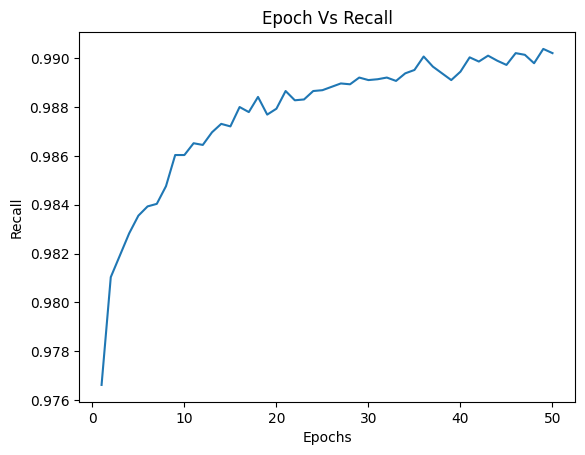

In [ ]:
# Recall
plt.plot(range(1,51),Model18.history_['recall'])

plt.title('Epoch Vs Recall')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.show()

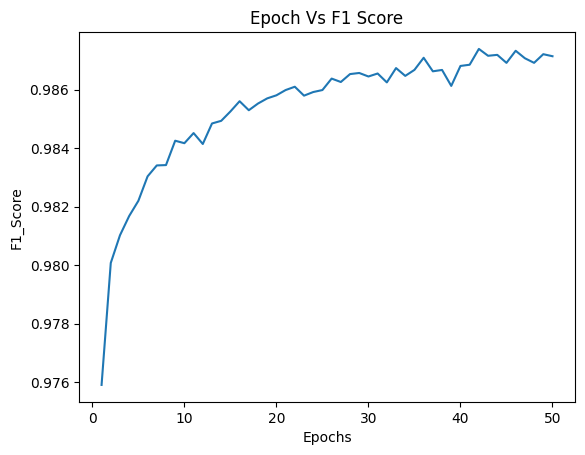

In [ ]:
#F1 Score

list_f1_score=[]

for p,r in list(map(lambda x, y:(x,y), Model18.history_['precision'], Model18.history_['recall'])):

  list_f1_score.append((2*p*r)/(p+r))

list_f1_score


plt.plot(range(1,51),list_f1_score)

plt.title('Epoch Vs F1 Score')
plt.ylabel('F1_Score')
plt.xlabel('Epochs')
plt.show()

##NA ----CNN
Model 20

In [ ]:
# cnn_model = Sequential()
# cnn_model.add(layers.Dense(60, input_shape=(X_train_std[selected_features].shape[1],), activation='relu'))
# cnn_model.add(layers.Dense(1, activation='sigmoid'))
# cnn_model.compile(optimizer='adam',
#                loss='binary_crossentropy',
#                metrics=['accuracy'])
# Model20 = KerasClassifier(model=cnn_model, epochs=10, batch_size=5, verbose=0)

In [ ]:
# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(Model20, X_train_std[selected_features], y_train, cv=kfold)
# print(results.mean()*100, results.std()*100)

In [ ]:
# Model20.fit(X_train_std[selected_features], y_train)

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x7f5a8aad5a00>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

# **Model 1-7,18 Evaluation**

Feature selection for test dataset

In [ ]:
# std_scaler = StandardScaler()
# X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_selection = X_test_std[selected_features]
print(X_test_selection.shape)
print(y_test.value_counts())

(41415, 12)
0    29095
1    12320
Name: legitimate, dtype: int64


## Model 1

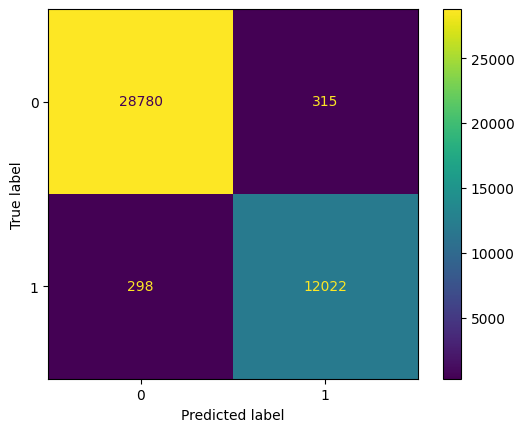


Accuracy: 0.985

F1 score: [0.98946247 0.97513891]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29078
           1       0.98      0.97      0.98     12337

    accuracy                           0.99     41415
   macro avg       0.98      0.98      0.98     41415
weighted avg       0.99      0.99      0.99     41415



In [ ]:
y_pred = Model1.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

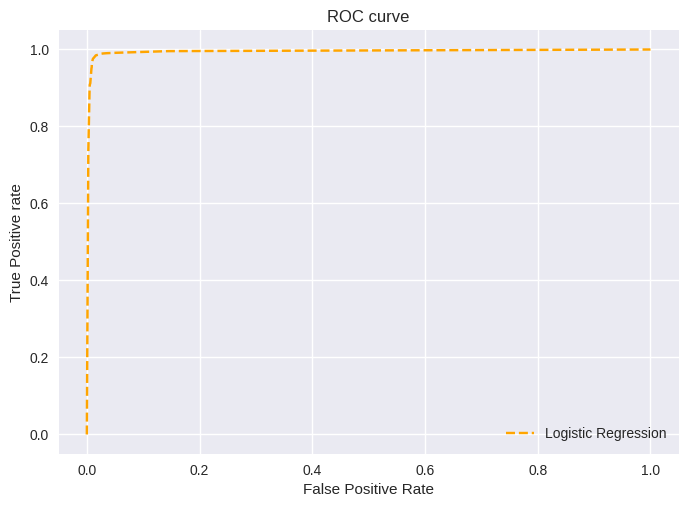

In [ ]:
pred_prob1 = Model1.predict_proba(X_test_selection)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
# plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Model 2

array([[28846,   249],
       [  116, 12204]])

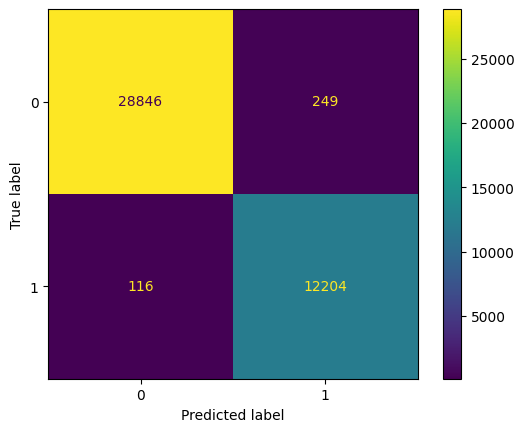


Accuracy: 0.991

F1 score: [0.99371308 0.98526622]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     28962
           1       0.99      0.98      0.99     12453

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



In [ ]:
y_pred = Model2.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
display(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

## Model 3

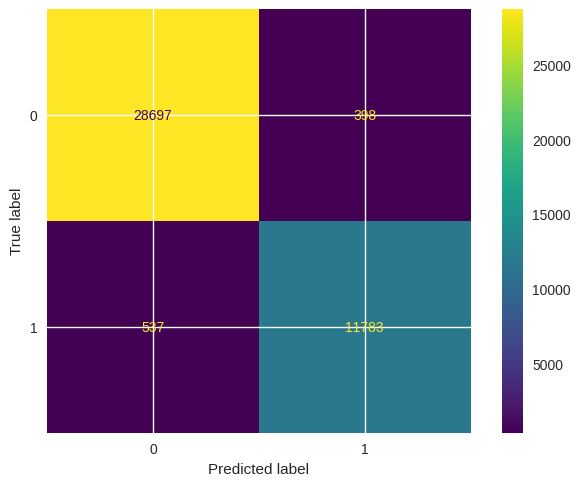


Accuracy: 0.977

F1 score: [0.98397024 0.96183829]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     29234
           1       0.96      0.97      0.96     12181

    accuracy                           0.98     41415
   macro avg       0.97      0.97      0.97     41415
weighted avg       0.98      0.98      0.98     41415



In [ ]:
y_pred = Model3.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

## Model 4

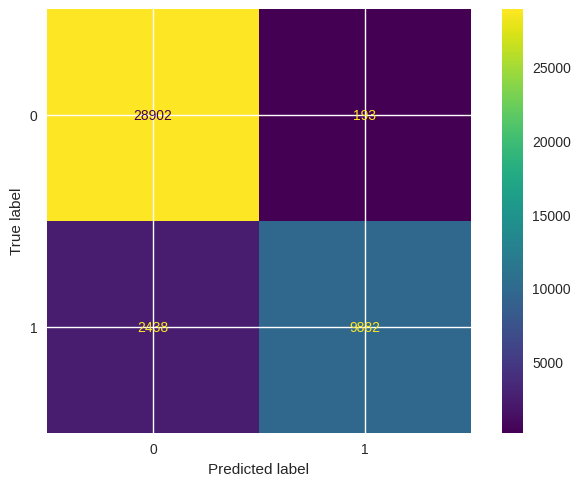


Accuracy: 0.936

F1 score: [0.95646562 0.88251842]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     31340
           1       0.80      0.98      0.88     10075

    accuracy                           0.94     41415
   macro avg       0.90      0.95      0.92     41415
weighted avg       0.95      0.94      0.94     41415



In [ ]:
y_pred = Model4.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

## Model 5

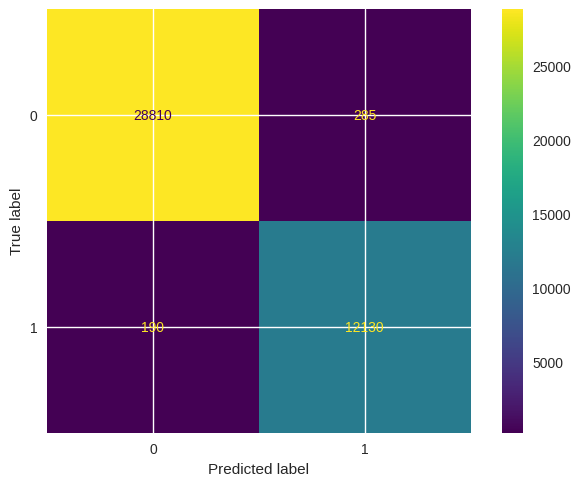


Accuracy: 0.989

F1 score: [0.99182374 0.98079644]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29000
           1       0.98      0.98      0.98     12415

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



In [ ]:
y_pred = Model5.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

## Model 6

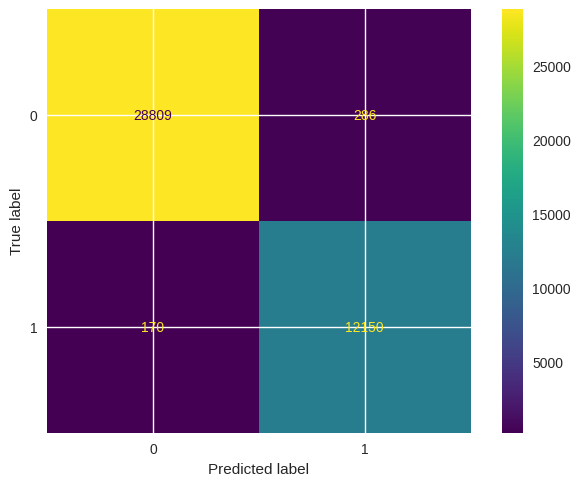


Accuracy: 0.989

F1 score: [0.99214795 0.98158022]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28979
           1       0.99      0.98      0.98     12436

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



In [ ]:
y_pred = Model6.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

## Model 7

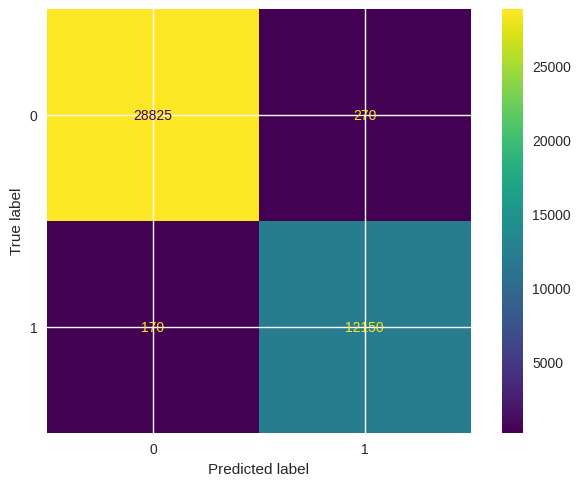


Accuracy: 0.989

F1 score: [0.99242555 0.98221504]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28995
           1       0.99      0.98      0.98     12420

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



In [ ]:
y_pred = Model7.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

## Model 18

array([[28821,   274],
       [  165, 12155]])

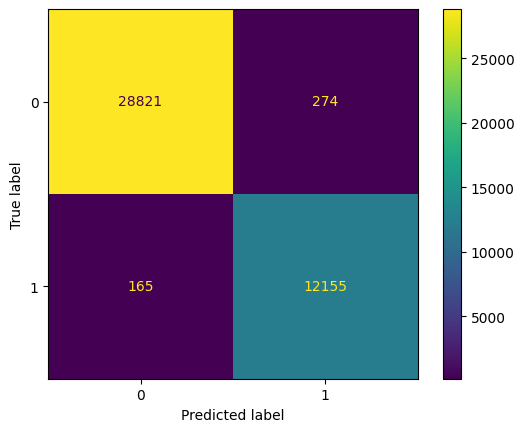


Accuracy: 0.989

F1 score: [0.99244159 0.98226191]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28986
           1       0.99      0.98      0.98     12429

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



In [ ]:
y_pred = Model18.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
display(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

## Model 20

In [ ]:
# y_pred = Model20.predict(X_test_selection)
# print(y_pred)

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()

# # acc = accuracy_score(y_test, y_pred)
# # print("\nAccuracy: %.3f" % acc)

# print(classification_report(y_pred,y_test))

## ROC curve data preparation

In [ ]:
pred_prob1 = Model1.predict_proba(X_test_selection)
pred_prob2 = Model2.predict_proba(X_test_selection)
pred_prob3 = Model3.predict_proba(X_test_selection)
pred_prob4 = Model4.predict_proba(X_test_selection)
pred_prob5 = Model5.predict_proba(X_test_selection)
pred_prob6 = Model6.predict_proba(X_test_selection)
pred_prob7 = Model7.predict_proba(X_test_selection)
pred_prob18 = Model18.predict_proba(X_test_selection)
# pred_prob20 = Model20.predict_proba(X_test_selection)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
fpr18, tpr18, thresh18 = roc_curve(y_test, pred_prob18[:,1], pos_label=1)
# fpr20, tpr20, thresh20 = roc_curve(y_test, pred_prob20[:,1], pos_label=1)

In [ ]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])
auc_score18 = roc_auc_score(y_test, pred_prob18[:,1])
# auc_score20 = roc_auc_score(y_test, pred_prob20[:,1])

# **Wrapper Method**

## Fit **Decision Tree** on the training dataset -
Model 8 - Using SFS and Decision Tree

In [ ]:
sfs = SFS(tree.DecisionTreeClassifier(criterion='gini', random_state=10, max_depth = 9, max_leaf_nodes = 30),
          k_features=12,
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 0)
sfs.fit(X_train_std.values, y_train)
selected_features=[]
for i in range(len(sfs.k_feature_names_)):
	selected_features.append(X_train_std.columns[int(sfs.k_feature_names_[i])])
print(selected_features)


['Machine', 'Characteristics', 'MajorOperatingSystemVersion', 'MajorImageVersion', 'MajorSubsystemVersion', 'CheckSum', 'Subsystem', 'DllCharacteristics', 'SectionsMeanEntropy', 'SectionsMeanRawsize', 'ResourcesMinEntropy', 'ResourcesMaxSize']


### Fit Model 8

In [ ]:
selected_features=['Machine', 'Characteristics', 'MajorOperatingSystemVersion', 'MajorImageVersion', 'MajorSubsystemVersion', 'CheckSum', 'Subsystem', 'DllCharacteristics', 'SectionsMeanEntropy', 'SectionsMeanRawsize', 'ResourcesMinEntropy', 'ResourcesMaxSize']
Model8 = tree.DecisionTreeClassifier(criterion='gini', random_state=10, max_depth = 9, max_leaf_nodes = 30)
scores = cross_val_score(Model8, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model8.fit(X_train_std[selected_features], y_train)
y_pred = Model8.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.988 0.002
0.9898791290669757


## Evaluate Model 8

feature selection for test dataset

In [ ]:
std_scaler = StandardScaler()
X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)
X_test_selection = X_test_std[selected_features]
print(X_test_selection.shape)
print(y_test.value_counts())

(41415, 12)
0    29095
1    12320
Name: legitimate, dtype: int64


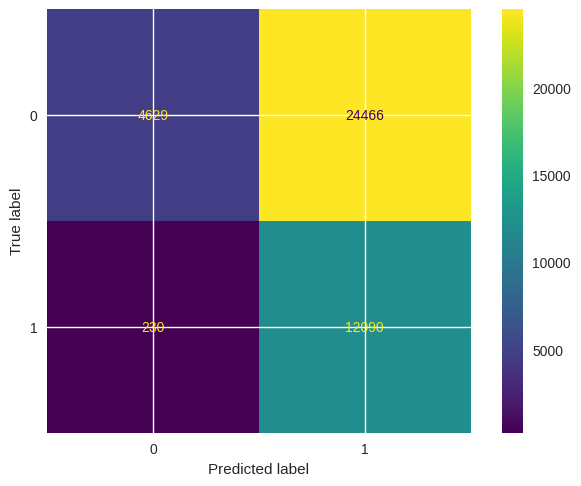


Accuracy: 0.404

F1 score: [0.27266301 0.49472134]
              precision    recall  f1-score   support

           0       0.16      0.95      0.27      4859
           1       0.98      0.33      0.49     36556

    accuracy                           0.40     41415
   macro avg       0.57      0.64      0.38     41415
weighted avg       0.88      0.40      0.47     41415



In [ ]:
y_pred = Model8.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob8 = Model8.predict_proba(X_test_selection)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8[:,1], pos_label=1)
auc_score8 = roc_auc_score(y_test, pred_prob8[:,1])

## Fit **Random Forest** on the training dataset -
Model 9 - Using SFS and Random Forest

In [ ]:
sfs = SFS(RandomForestClassifier(criterion='gini', n_estimators=90),
          k_features=12,
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 0)
sfs.fit(X_train_std.values, y_train)
selected_features=[]
for i in range(len(sfs.k_feature_names_)):
	selected_features.append(X_train_std.columns[int(sfs.k_feature_names_[i])])
print(selected_features)


['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'CheckSum', 'SectionsMeanEntropy']


### Fit Model 9

In [ ]:
selected_features=['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'CheckSum', 'SectionsMeanEntropy']
Model9 = RandomForestClassifier(criterion='gini', n_estimators=90)
scores = cross_val_score(Model9, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model9.fit(X_train_std[selected_features], y_train)
y_pred = Model9.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.991 0.000
0.9999689543836411


## Evaluate Model 9

feature selection for test dataset

In [ ]:
std_scaler = StandardScaler()
X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)
X_test_selection = X_test_std[selected_features]
print(X_test_selection.shape)
print(y_test.value_counts())

(41415, 12)
0    29095
1    12320
Name: legitimate, dtype: int64


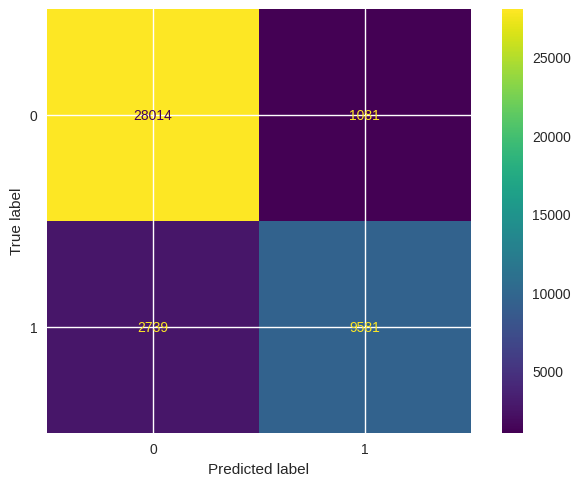


Accuracy: 0.908

F1 score: [0.93617163 0.83378296]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     30753
           1       0.78      0.90      0.83     10662

    accuracy                           0.91     41415
   macro avg       0.87      0.90      0.88     41415
weighted avg       0.92      0.91      0.91     41415



In [ ]:
y_pred = Model9.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob9 = Model9.predict_proba(X_test_selection)
fpr9, tpr9, thresh9 = roc_curve(y_test, pred_prob9[:,1], pos_label=1)
auc_score9 = roc_auc_score(y_test, pred_prob9[:,1])

## Fit **Logistic Regression** on the training dataset -
Model 10 - Using SFS and Logistic Regression

In [ ]:
sfs = SFS(LogisticRegression(C=100, penalty= 'l2', solver='lbfgs'),
          k_features=12,
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 0)
sfs.fit(X_train_std.values, y_train)
selected_features=[]
for i in range(len(sfs.k_feature_names_)):
	selected_features.append(X_train_std.columns[int(sfs.k_feature_names_[i])])
print(selected_features)


['SizeOfOptionalHeader', 'FileAlignment', 'MajorSubsystemVersion', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SectionsMeanEntropy', 'SectionsMaxEntropy', 'ImportsNbDLL', 'ResourcesNb', 'ResourcesMaxEntropy', 'VersionInformationSize']


### Fit Model 10

In [ ]:
selected_features=['SizeOfOptionalHeader', 'FileAlignment', 'MajorSubsystemVersion', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SectionsMeanEntropy', 'SectionsMaxEntropy', 'ImportsNbDLL', 'ResourcesNb', 'ResourcesMaxEntropy', 'VersionInformationSize']
Model10 = LogisticRegression(C=100, penalty= 'l2', solver='lbfgs')
scores = cross_val_score(Model10, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model10.fit(X_train_std[selected_features], y_train)
y_pred = Model10.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.979 0.000
0.9793339680437122


## Evaluate Model 10

feature selection for test dataset

In [ ]:
std_scaler = StandardScaler()
X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)
X_test_selection = X_test_std[selected_features]
print(X_test_selection.shape)
print(y_test.value_counts())

(41415, 12)
0    29095
1    12320
Name: legitimate, dtype: int64


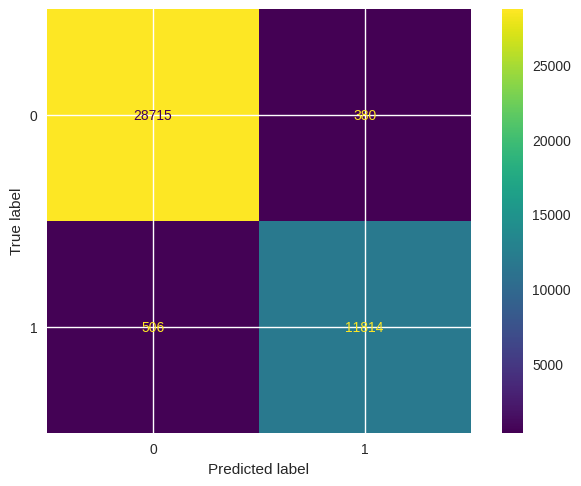


Accuracy: 0.979

F1 score: [0.98480691 0.96385739]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     29221
           1       0.96      0.97      0.96     12194

    accuracy                           0.98     41415
   macro avg       0.97      0.98      0.97     41415
weighted avg       0.98      0.98      0.98     41415



In [ ]:
y_pred = Model10.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob10 = Model10.predict_proba(X_test_selection)
fpr10, tpr10, thresh10 = roc_curve(y_test, pred_prob10[:,1], pos_label=1)
auc_score10 = roc_auc_score(y_test, pred_prob10[:,1])

## Fit **Naive Bayes** on the training dataset -
Model 11 - Using SFS and Naive Bayes

In [ ]:
sfs = SFS(GaussianNB(var_smoothing=0.0001),
          k_features=12,
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 0)
sfs.fit(X_train_std.values, y_train)
selected_features=[]
for i in range(len(sfs.k_feature_names_)):
	selected_features.append(X_train_std.columns[int(sfs.k_feature_names_[i])])
print(selected_features)


['Characteristics', 'MajorLinkerVersion', 'MajorSubsystemVersion', 'SizeOfHeaders', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SectionsMaxEntropy', 'SectionsMeanVirtualsize', 'ImportsNbDLL', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'VersionInformationSize']


### Fit Model 11

In [ ]:
selected_features=['Characteristics', 'MajorLinkerVersion', 'MajorSubsystemVersion', 'SizeOfHeaders', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SectionsMaxEntropy', 'SectionsMeanVirtualsize', 'ImportsNbDLL', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'VersionInformationSize']
Model11 = GaussianNB(var_smoothing=0.0001)
scores = cross_val_score(Model11, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model11.fit(X_train_std[selected_features], y_train)
y_pred = Model11.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.973 0.003
0.9734766950906532


## Evaluate Model 11

feature selection for test dataset

In [ ]:
std_scaler = StandardScaler()
X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)
X_test_selection = X_test_std[selected_features]
print(X_test_selection.shape)
print(y_test.value_counts())

(41415, 12)
0    29095
1    12320
Name: legitimate, dtype: int64


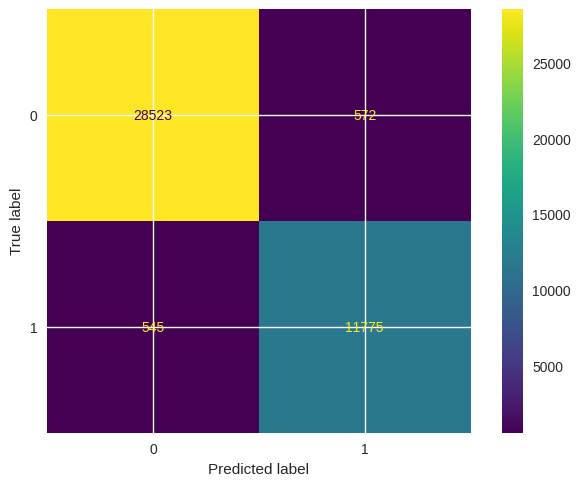


Accuracy: 0.973

F1 score: [0.98079535 0.95471683]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29068
           1       0.96      0.95      0.95     12347

    accuracy                           0.97     41415
   macro avg       0.97      0.97      0.97     41415
weighted avg       0.97      0.97      0.97     41415



In [ ]:
y_pred = Model11.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob11 = Model11.predict_proba(X_test_selection)
fpr11, tpr11, thresh11 = roc_curve(y_test, pred_prob11[:,1], pos_label=1)
auc_score11 = roc_auc_score(y_test, pred_prob11[:,1])

## Fit **SVC** on the training dataset -
Model 12 - Using SFS and SVC

In [ ]:
sfs = SFS(svm.SVC(C=1,gamma=0.9,kernel='linear'),
          k_features=12,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 0
          )
sfs.fit(X_train_std.values, y_train)
selected_features=[]
for i in range(len(sfs.k_feature_names_)):
	selected_features.append(X_train_std.columns[int(sfs.k_feature_names_[i])])
print(selected_features)

### Fit Model 12

In [ ]:
selected_features=['Characteristics', 'MajorLinkerVersion', 'MajorSubsystemVersion', 'SizeOfHeaders', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SectionsMaxEntropy', 'SectionsMeanVirtualsize', 'ImportsNbDLL', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'VersionInformationSize']


In [ ]:
Model12 = svm.SVC(C=1,gamma=0.9,kernel='rbf',probability=True)
scores = cross_val_score(Model12, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model12.fit(X_train_std[selected_features], y_train)
y_pred = Model12.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.991 0.000
0.9938115738057787


## Evaluate Model 12

feature selection for test dataset

In [ ]:
std_scaler = StandardScaler()
X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)
X_test_selection = X_test_std[selected_features]
print(X_test_selection.shape)
print(y_test.value_counts())

(41415, 12)
0    29095
1    12320
Name: legitimate, dtype: int64


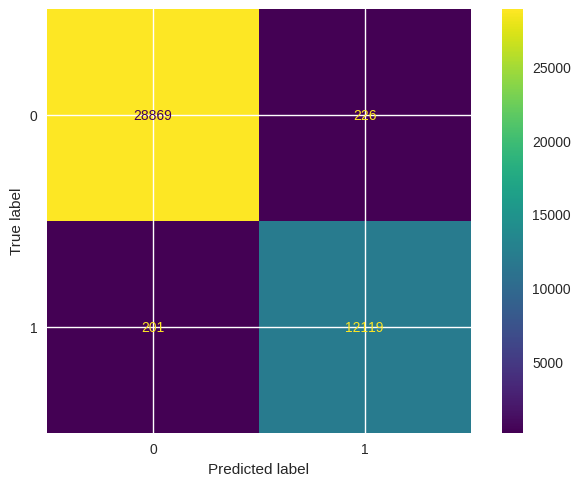


Accuracy: 0.990

F1 score: [0.99265882 0.98268802]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29070
           1       0.98      0.98      0.98     12345

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



In [ ]:
y_pred = Model12.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob12 = Model12.predict_proba(X_test_selection)
fpr12, tpr12, thresh12 = roc_curve(y_test, pred_prob12[:,1], pos_label=1)
auc_score12 = roc_auc_score(y_test, pred_prob12[:,1])

## Fit **kNN** on the training dataset -
Model 13 - Using SFS and kNN

In [ ]:
sfs = SFS(KNeighborsClassifier(n_neighbors=5),
          k_features=12,
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 0)
sfs.fit(X_train_std.values, y_train)
selected_features=[]
for i in range(len(sfs.k_feature_names_)):
	selected_features.append(X_train_std.columns[int(sfs.k_feature_names_[i])])
print(selected_features)


['Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfUninitializedData', 'Subsystem', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SectionsMinRawsize', 'SectionsMinVirtualsize', 'ResourcesMaxEntropy', 'VersionInformationSize']


### Fit Model 13

In [ ]:
selected_features=['Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfUninitializedData', 'Subsystem', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SectionsMinRawsize', 'SectionsMinVirtualsize', 'ResourcesMaxEntropy', 'VersionInformationSize']
Model13 = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(Model13, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model13.fit(X_train_std[selected_features], y_train)
y_pred = Model13.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.990 0.000
0.9932320556337445


## Evaluate Model 13

feature selection for test dataset

In [ ]:
std_scaler = StandardScaler()
X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)
X_test_selection = X_test_std[selected_features]
print(X_test_selection.shape)
print(y_test.value_counts())

(41415, 12)
0    29095
1    12320
Name: legitimate, dtype: int64


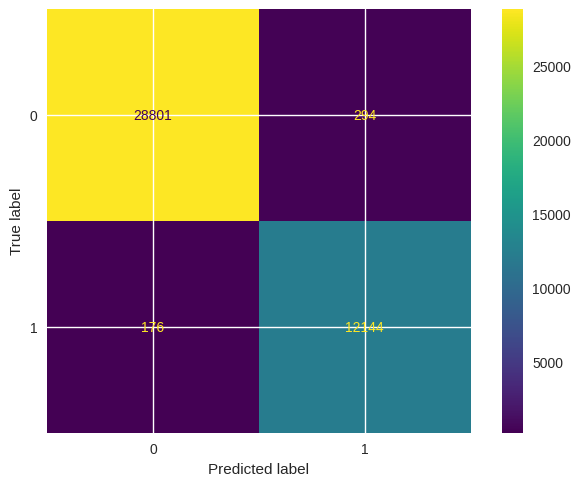


Accuracy: 0.989

F1 score: [0.9919066  0.98101624]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28977
           1       0.99      0.98      0.98     12438

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



In [ ]:
y_pred = Model13.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob13 = Model13.predict_proba(X_test_selection)
fpr13, tpr13, thresh13 = roc_curve(y_test, pred_prob13[:,1], pos_label=1)
auc_score13 = roc_auc_score(y_test, pred_prob13[:,1])

## Fit **XGBoost** on the training dataset -
Model 14 - Using SFS and XGBoost

In [ ]:
sfs = SFS(xgb.XGBClassifier(learning_rate=0.1,max_depth=7,n_estimators=90),
          k_features=12,
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 0)
sfs.fit(X_train_std.values, y_train)
selected_features=[]
for i in range(len(sfs.k_feature_names_)):
	selected_features.append(X_train_std.columns[int(sfs.k_feature_names_[i])])
print(selected_features)


['SizeOfCode', 'AddressOfEntryPoint', 'ImageBase', 'MajorImageVersion', 'CheckSum', 'DllCharacteristics', 'SectionsMinEntropy', 'SectionsMaxEntropy', 'ResourcesMaxEntropy', 'ResourcesMeanSize', 'ResourcesMinSize', 'VersionInformationSize']


### Fit Model 14

In [ ]:
selected_features=['SizeOfCode', 'AddressOfEntryPoint', 'ImageBase', 'MajorImageVersion', 'CheckSum', 'DllCharacteristics', 'SectionsMinEntropy', 'SectionsMaxEntropy', 'ResourcesMaxEntropy', 'ResourcesMeanSize', 'ResourcesMinSize', 'VersionInformationSize']
Model14 = xgb.XGBClassifier(learning_rate=0.1,max_depth=7,n_estimators=90)
scores = cross_val_score(Model14, X_train_std[selected_features], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model14.fit(X_train_std[selected_features], y_train)
y_pred = Model14.predict(X_train_std[selected_features])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.993 0.001
0.9966884675883765


## Evaluate Model 14

feature selection for test dataset

In [ ]:
std_scaler = StandardScaler()
X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)
X_test_selection = X_test_std[selected_features]
print(X_test_selection.shape)
print(y_test.value_counts())

(41415, 12)
0    29095
1    12320
Name: legitimate, dtype: int64


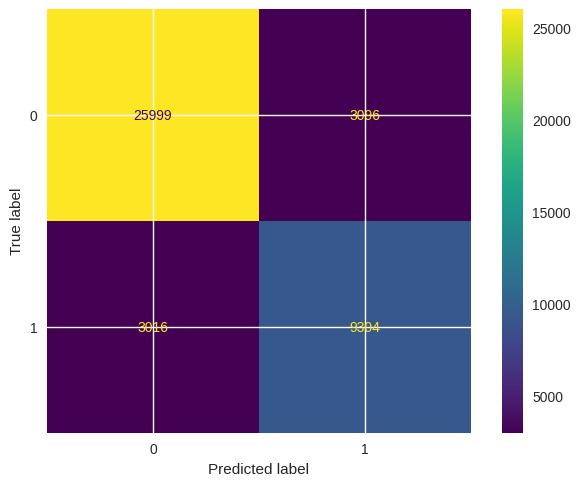


Accuracy: 0.852

F1 score: [0.89482017 0.75275081]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     29015
           1       0.76      0.75      0.75     12400

    accuracy                           0.85     41415
   macro avg       0.82      0.82      0.82     41415
weighted avg       0.85      0.85      0.85     41415



In [ ]:
y_pred = Model14.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob14 = Model14.predict_proba(X_test_selection)
fpr14, tpr14, thresh14 = roc_curve(y_test, pred_prob14[:,1], pos_label=1)
auc_score14 = roc_auc_score(y_test, pred_prob14[:,1])

# **Embedded Feature Selection** 

## Use LassoCV and Logistic Regression
Model 15

### Fit Model 15
LASSO, Logistic Regression

Feature selection using Lasso

In [ ]:
skf = StratifiedKFold(n_splits=10)
lasso = LassoCV(cv=skf, random_state=42).fit(X_train_std, y_train)
print(lasso.coef_)
selected_features_embedded=[]
for i in range(len(lasso.feature_names_in_)):
	if lasso.coef_[i]!=0:
	  selected_features_embedded.append(lasso.feature_names_in_[i])
print(selected_features_embedded)

[ 0.02253915  0.02832629 -0.03186821  0.00243031  0.00494969  0.
 -0.00042686 -0.         -0.         -0.          0.         -0.
 -0.          0.00809664 -0.         -0.          0.00940343  0.
  0.0608622  -0.         -0.00119328 -0.         -0.00258833  0.06993648
 -0.13578088 -0.05313247  0.00079857 -0.01623498 -0.         -0.
 -0.         -0.0359338   0.01931218 -0.03458923 -0.14393961 -0.
  0.00352359 -0.         -0.          0.         -0.0002659   0.00373581
  0.0304253   0.00588483  0.01905568  0.0095051  -0.00592979  0.04822062
 -0.00828468 -0.00020101 -0.         -0.00088376 -0.          0.09580551]
['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfInitializedData', 'FileAlignment', 'MajorImageVersion', 'MajorSubsystemVersion', 'SizeOfImage', 'CheckSum', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SectionsNb', 'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsM

In [ ]:
selected_features_embedded=['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfInitializedData', 'FileAlignment', 'MajorImageVersion', 'MajorSubsystemVersion', 'SizeOfImage', 'CheckSum', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SectionsNb', 'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy', 'SectionsMinRawsize', 'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb', 'ImportsNbOrdinal', 'ExportNb', 'ResourcesNb', 'ResourcesMeanEntropy', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'ResourcesMeanSize', 'ResourcesMaxSize', 'VersionInformationSize']
Model15 = LogisticRegression(C=100, penalty= 'l2', solver='lbfgs')
scores = cross_val_score(Model15, X_train_std[selected_features_embedded], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model15.fit(X_train_std[selected_features_embedded], y_train)
y_pred = Model15.predict(X_train_std[selected_features_embedded])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.980 0.001
0.9800169716036096


## Evaluate Model 15

feature selection for test dataset

In [ ]:

X_test_selection = X_test_std[selected_features_embedded]
print(X_test_selection.shape)
print(y_test.value_counts())

(41415, 33)
0    29095
1    12320
Name: legitimate, dtype: int64


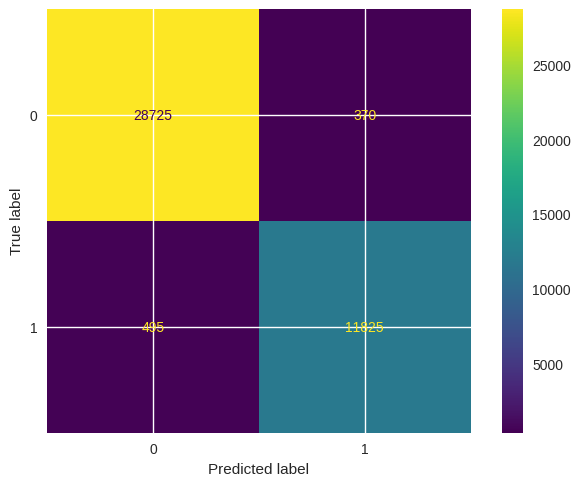


Accuracy: 0.979

F1 score: [0.98516677 0.96471548]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     29220
           1       0.96      0.97      0.96     12195

    accuracy                           0.98     41415
   macro avg       0.97      0.98      0.97     41415
weighted avg       0.98      0.98      0.98     41415



In [ ]:
y_pred = Model15.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob15 = Model15.predict_proba(X_test_selection)
fpr15, tpr15, thresh15 = roc_curve(y_test, pred_prob15[:,1], pos_label=1)
auc_score15 = roc_auc_score(y_test, pred_prob15[:,1])

## Feature selection using Random Forest
Model 16

In [ ]:
sel = SelectFromModel(RandomForestClassifier(criterion='gini',n_estimators = 100))
sel.fit(X_train, y_train)
selected_features_embedded= list(X_train.columns[(sel.get_support())])
print(selected_features_embedded)

['Characteristics', 'ImageBase', 'MajorOperatingSystemVersion', 'MinorImageVersion', 'Subsystem', 'SizeOfStackReserve', 'SectionsMaxEntropy', 'ExportNb', 'ResourcesNb', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'ResourcesMinSize', 'VersionInformationSize']


### Fit Model 16

In [ ]:
selected_features_embedded=['Characteristics', 'ImageBase', 'MajorOperatingSystemVersion', 'MinorImageVersion', 'Subsystem', 'SizeOfStackReserve', 'SectionsMaxEntropy', 'ExportNb', 'ResourcesNb', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'ResourcesMinSize', 'VersionInformationSize']
Model16 = RandomForestClassifier(criterion='gini', n_estimators=100)
scores = cross_val_score(Model16, X_train_std[selected_features_embedded], y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model16.fit(X_train_std[selected_features_embedded], y_train)
y_pred = Model16.predict(X_train_std[selected_features_embedded])
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.993 0.000
0.9998861660733505


## Evaluate Model 16

feature selection for test dataset

In [ ]:
X_test_selection = X_test_std[selected_features_embedded]
print(X_test_selection.shape)
print(y_test.value_counts())

(41415, 13)
0    29095
1    12320
Name: legitimate, dtype: int64


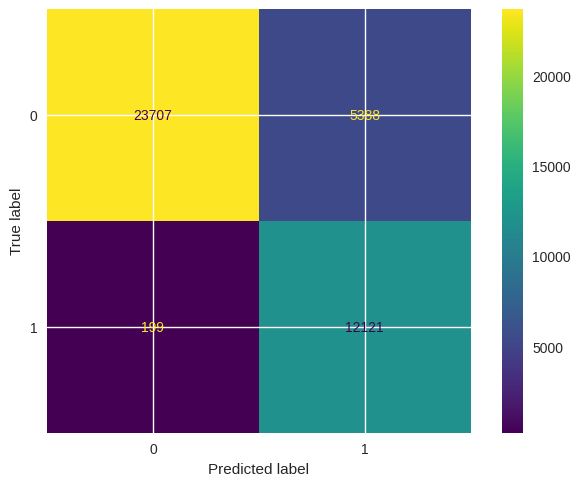


Accuracy: 0.865

F1 score: [0.89458689 0.81269905]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     23906
           1       0.98      0.69      0.81     17509

    accuracy                           0.87     41415
   macro avg       0.90      0.84      0.85     41415
weighted avg       0.89      0.87      0.86     41415



In [ ]:
y_pred = Model16.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob16 = Model16.predict_proba(X_test_selection)
fpr16, tpr16, thresh16 = roc_curve(y_test, pred_prob16[:,1], pos_label=1)
auc_score16 = roc_auc_score(y_test, pred_prob16[:,1])

## Feature selection using XGBoost
Model 17

In [ ]:
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=7,n_estimators=90)
model.fit(X_train, y_train)
print(np.sort(model.feature_importances_))

[0.         0.         0.         0.         0.00082729 0.00087604
 0.00107587 0.00115955 0.00122993 0.00132277 0.0014259  0.00144529
 0.00145459 0.00148696 0.00156951 0.00159693 0.00162101 0.00163948
 0.00165526 0.00168673 0.00180206 0.00181178 0.00184565 0.00185867
 0.0018907  0.00200558 0.00203346 0.00206987 0.00213789 0.00250591
 0.00262972 0.00265395 0.00272457 0.00277528 0.00292745 0.00328357
 0.00334356 0.00351858 0.00381594 0.00400525 0.00465768 0.00530387
 0.00545664 0.00592018 0.00640644 0.00652273 0.00733133 0.00755139
 0.00845749 0.01377192 0.01944153 0.06169903 0.213421   0.5603462 ]


In [ ]:
selection = SelectFromModel(model,threshold=0.006, prefit=True)
selected_features_embedded= list(X_train.columns[(selection.get_support())])
selected_features_embedded

['SizeOfUninitializedData',
 'ImageBase',
 'MajorOperatingSystemVersion',
 'MinorOperatingSystemVersion',
 'MajorImageVersion',
 'MajorSubsystemVersion',
 'Subsystem',
 'SizeOfStackReserve',
 'SectionsMinRawsize',
 'VersionInformationSize']

### Fit Model 17

In [ ]:
select_X_train = selection.transform(X_train_std)
Model17 = xgb.XGBClassifier(learning_rate=0.1,max_depth=7,n_estimators=90)
scores = cross_val_score(Model17, select_X_train, y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model17.fit(select_X_train, y_train)
y_pred = Model17.predict(select_X_train)
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.990 0.001
0.9911106051825482


## Evaluate Model 17

feature selection for test dataset

In [ ]:
std_scaler = StandardScaler()
X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)
X_test_selection = selection.transform(X_test_std)
print(X_test_selection.shape)
print(y_test.value_counts())

(41415, 10)
0    29095
1    12320
Name: legitimate, dtype: int64


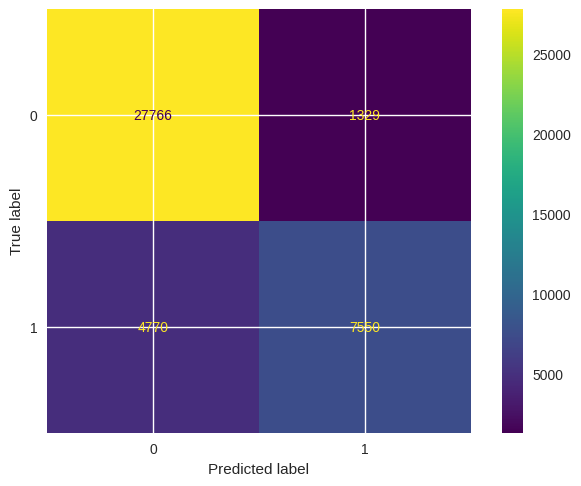


Accuracy: 0.853

F1 score: [0.90104006 0.71229775]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     32536
           1       0.61      0.85      0.71      8879

    accuracy                           0.85     41415
   macro avg       0.78      0.85      0.81     41415
weighted avg       0.88      0.85      0.86     41415



In [ ]:
y_pred = Model17.predict(X_test_selection)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob17 = Model17.predict_proba(X_test_selection)
fpr17, tpr17, thresh17 = roc_curve(y_test, pred_prob17[:,1], pos_label=1)
auc_score17 = roc_auc_score(y_test, pred_prob17[:,1])

# Best Models without Feature Selection

## RF

In [ ]:
Model20 = RandomForestClassifier(criterion='gini', n_estimators=100)
scores = cross_val_score(Model20, X_train_std, y_train, cv=5)
print('Scores:  %.3f %.3f' % (mean(scores), std(scores)) )

Model20.fit(X_train_std, y_train)
y_pred = Model20.predict(X_train_std)
acc=accuracy_score(y_train,y_pred)
print(acc)

Scores:  0.994 0.000
0.9999793029224273


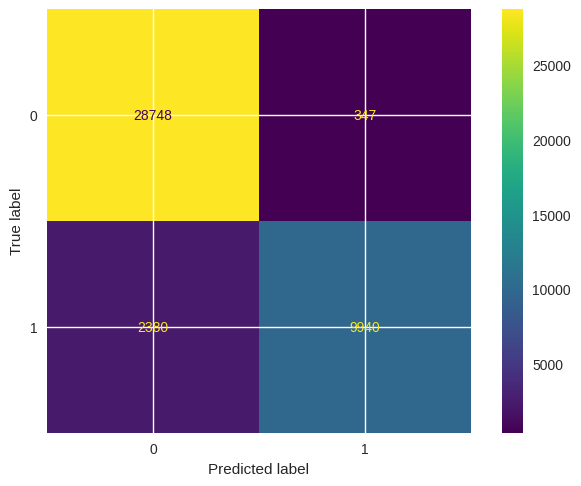


Accuracy: 0.934

F1 score: [0.9547183  0.87937365]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     31128
           1       0.81      0.97      0.88     10287

    accuracy                           0.93     41415
   macro avg       0.90      0.94      0.92     41415
weighted avg       0.94      0.93      0.94     41415



In [ ]:
y_pred = Model20.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob20 = Model20.predict_proba(X_test_std)
fpr20, tpr20, thresh20 = roc_curve(y_test, pred_prob20[:,1], pos_label=1)
auc_score20 = roc_auc_score(y_test, pred_prob20[:,1])

##MLP

In [ ]:
# Model19 = MLPClassifier(hidden_layer_sizes=(150,400,50), max_iter=100,activation = 'tanh',solver='adam',learning_rate='adaptive',random_state=1)

In [ ]:
Metrics_List=[tf.keras.metrics.BinaryAccuracy(name="accuracy"),
              tf.keras.metrics.Precision(name="precision"),
              tf.keras.metrics.Recall(name="recall")]
Malware_model = Sequential()
Malware_model.add(layers.Dense(60, input_shape=(X_train_std.shape[1],), activation='relu'))
Malware_model.add(layers.Dense(60, activation='relu'))
Malware_model.add(layers.Dense(1, activation='sigmoid'))
Malware_model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=Metrics_List)
Model19=KerasClassifier(model=Malware_model, epochs=50, batch_size=5, verbose=0)


In [ ]:
# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(Model19, X_train_std, y_train, cv=kfold)
# print(results.mean()*100, results.std()*100)

In [ ]:
Model19.fit(X_train_std, y_train)

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x7f2c9ed86130>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

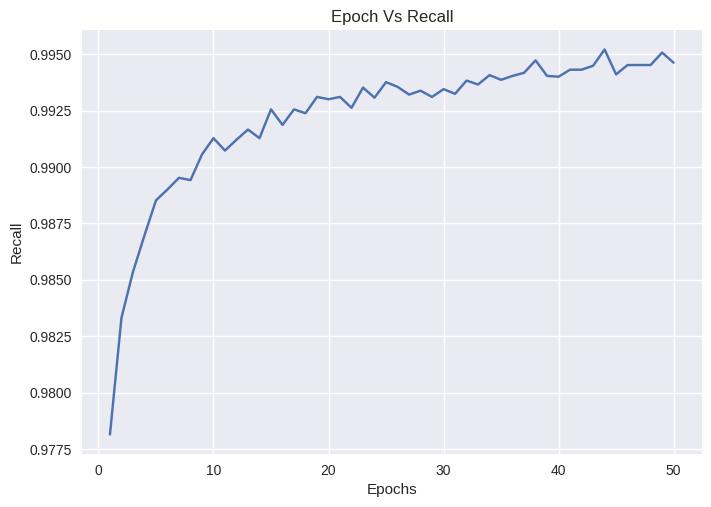

In [ ]:
# Recall
plt.plot(range(1,51),Model19.history_['recall'])

plt.title('Epoch Vs Recall')
plt.ylabel('Recall')  
plt.xlabel('Epochs')
plt.show()

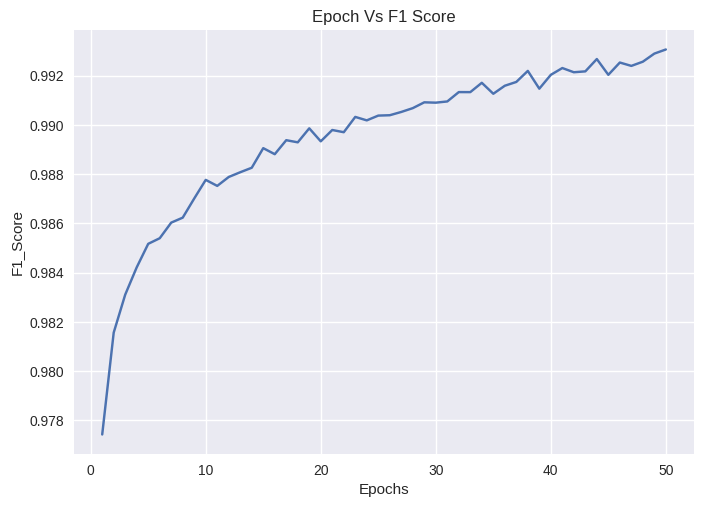

In [ ]:
#F1 Score

list_f1_score=[]

for p,r in list(map(lambda x, y:(x,y), Model19.history_['precision'], Model19.history_['recall'])):

  list_f1_score.append((2*p*r)/(p+r))

list_f1_score


plt.plot(range(1,51),list_f1_score)

plt.title('Epoch Vs F1 Score')
plt.ylabel('F1_Score')
plt.xlabel('Epochs')
plt.show()

In [ ]:
y_pred = Model19.predict(X_train_std)
acc=accuracy_score(y_train,y_pred)
print(acc)

0.9955397797830946


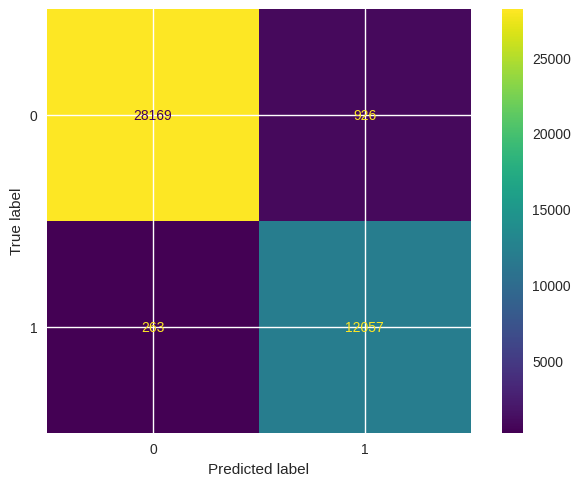


Accuracy: 0.971

F1 score: [0.97933144 0.95300952]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28432
           1       0.98      0.93      0.95     12983

    accuracy                           0.97     41415
   macro avg       0.97      0.96      0.97     41415
weighted avg       0.97      0.97      0.97     41415



In [ ]:
y_pred = Model19.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

acc = accuracy_score(y_test, y_pred)
print("\nAccuracy: %.3f" % acc)

f1 = f1_score(y_test, y_pred, average=None)
print("\nF1 score:", f1)

print(classification_report(y_pred,y_test))

In [ ]:
pred_prob19 = Model19.predict_proba(X_test_std)
fpr19, tpr19, thresh19 = roc_curve(y_test, pred_prob19[:,1], pos_label=1)
auc_score19 = roc_auc_score(y_test, pred_prob19[:,1])

##CNN

In [ ]:
# Malware_model = Sequential()
# Malware_model.add(layers.Dense(60, input_shape=(X_train_std.shape[1],), activation='relu'))
# Malware_model.add(layers.Dense(1, activation='sigmoid'))
# Malware_model.compile(optimizer='adam',
#                loss='binary_crossentropy',
#                metrics=['accuracy'])
# Model21 = KerasClassifier(model=Malware_model, epochs=10, batch_size=5, verbose=0)

In [ ]:

# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(Model21, X_train_std, y_train, cv=kfold)
# print(results.mean()*100, results.std()*100)

In [ ]:
# Model21.fit(X_train, y_train)

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x7f5a8adc19d0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [ ]:
# y_pred = Model21.predict(X_test_std)
# print(y_pred)

[0 1 0 ... 0 0 0]


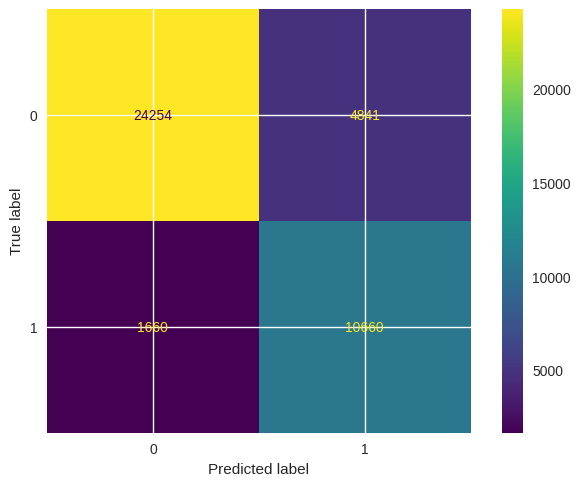

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     25914
           1       0.87      0.69      0.77     15501

    accuracy                           0.84     41415
   macro avg       0.85      0.81      0.82     41415
weighted avg       0.85      0.84      0.84     41415



In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()

# # acc = accuracy_score(y_test, y_pred)
# # print("\nAccuracy: %.3f" % acc)

# print(classification_report(y_pred,y_test))

In [ ]:
# pred_prob21 = Model21.predict_proba(X_test_std)
# fpr21, tpr21, thresh21 = roc_curve(y_test, pred_prob21[:,1], pos_label=1)
# auc_score21 = roc_auc_score(y_test, pred_prob21[:,1])

# ROC

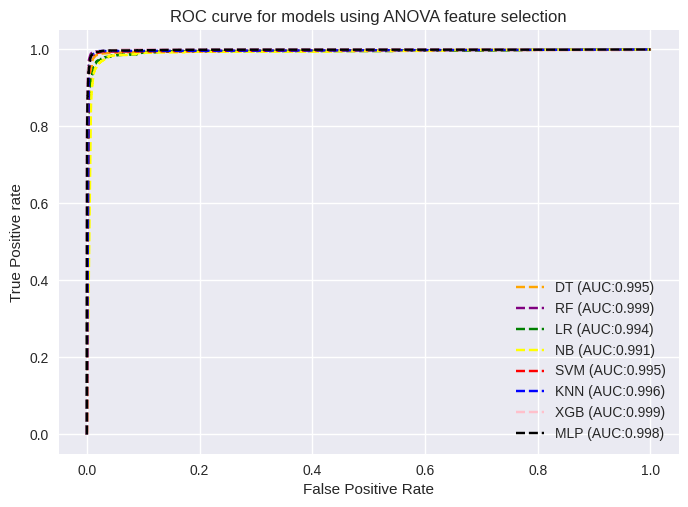

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='DT (AUC:'+str(round(auc_score1,3))+')')
plt.plot(fpr2, tpr2, linestyle='--',color='purple', label='RF (AUC:'+str(round(auc_score2,3))+')')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='LR (AUC:'+str(round(auc_score3,3))+')')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='NB (AUC:'+str(round(auc_score4,3))+')')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='SVM (AUC:'+str(round(auc_score5,3))+')')
plt.plot(fpr6, tpr6, linestyle='--',color='blue', label='KNN (AUC:'+str(round(auc_score6,3))+')')
plt.plot(fpr7, tpr7, linestyle='--',color='pink', label='XGB (AUC:'+str(round(auc_score7,3))+')')
plt.plot(fpr18, tpr18, linestyle='--',color='black', label='MLP (AUC:'+str(round(auc_score18,3))+')')
# plt.plot(fpr20, tpr20, linestyle='--',color='brown', label='CNN (AUC:'+str(round(auc_score20,3))+')')

# title
plt.title('ROC curve for models using ANOVA feature selection')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

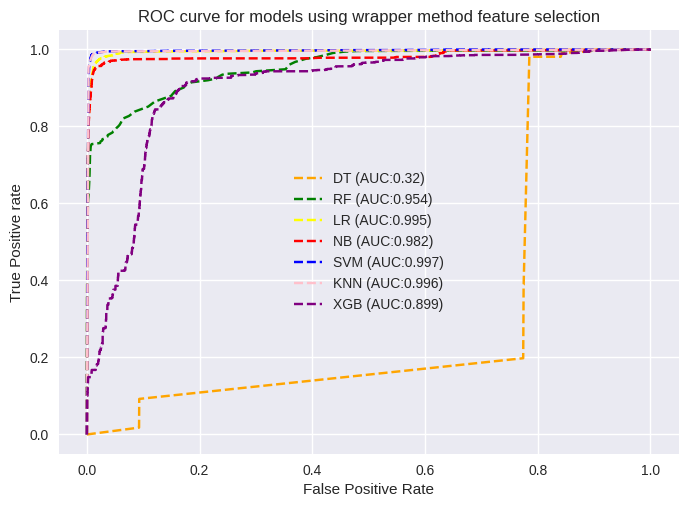

In [ ]:
plt.plot(fpr8, tpr8, linestyle='--',color='orange', label='DT (AUC:'+str(round(auc_score8,3))+')')
plt.plot(fpr9, tpr9, linestyle='--',color='green', label='RF (AUC:'+str(round(auc_score9,3))+')')
plt.plot(fpr10, tpr10, linestyle='--',color='yellow', label='LR (AUC:'+str(round(auc_score10,3))+')')
plt.plot(fpr11, tpr11, linestyle='--',color='red', label='NB (AUC:'+str(round(auc_score11,3))+')')
plt.plot(fpr12, tpr12, linestyle='--',color='blue', label='SVM (AUC:'+str(round(auc_score12,3))+')')
plt.plot(fpr13, tpr13, linestyle='--',color='pink', label='KNN (AUC:'+str(round(auc_score13,3))+')')
plt.plot(fpr14, tpr14, linestyle='--',color='purple', label='XGB (AUC:'+str(round(auc_score14,3))+')')
# title
plt.title('ROC curve for models using wrapper method feature selection')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

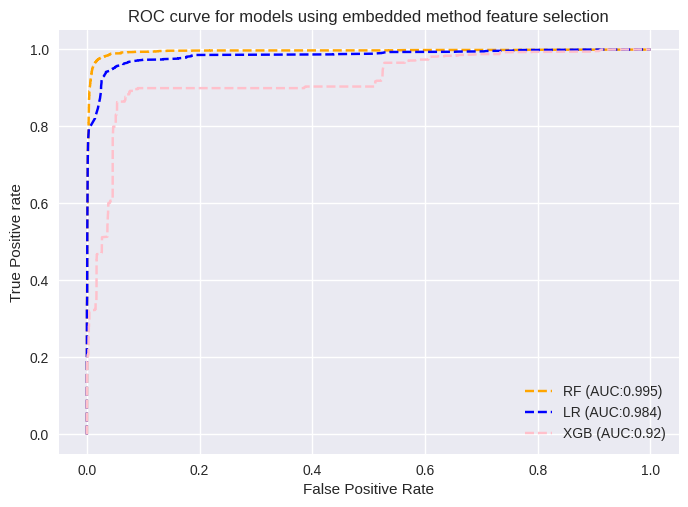

In [ ]:
plt.plot(fpr15, tpr15, linestyle='--',color='orange', label='RF (AUC:'+str(round(auc_score15,3))+')')
plt.plot(fpr16, tpr16, linestyle='--',color='blue', label='LR (AUC:'+str(round(auc_score16,3))+')')
plt.plot(fpr17, tpr17, linestyle='--',color='pink', label='XGB (AUC:'+str(round(auc_score17,3))+')')
# title
plt.title('ROC curve for models using embedded method feature selection')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

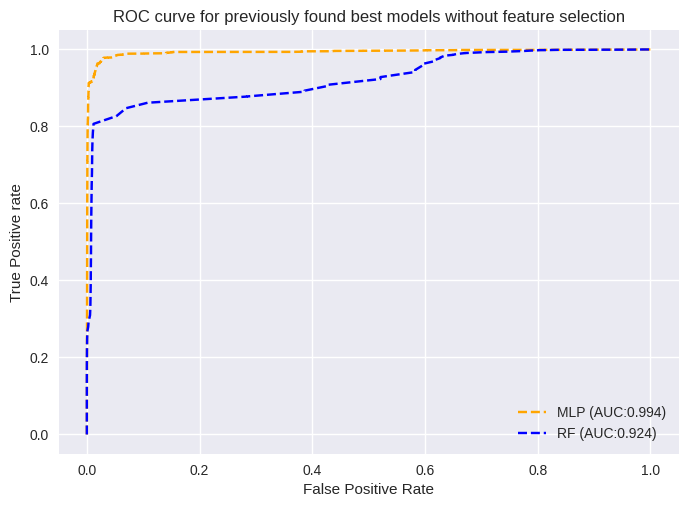

In [ ]:
plt.plot(fpr19, tpr19, linestyle='--',color='orange', label='MLP (AUC:'+str(round(auc_score19,3))+')')
plt.plot(fpr20, tpr20, linestyle='--',color='blue', label='RF (AUC:'+str(round(auc_score20,3))+')')
# title
plt.title('ROC curve for previously found best models without feature selection')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();